In [1257]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm
from pandas import Series, DataFrame, Panel

<ipython-input-1257-f950cdd0f2a7>:8: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Series, DataFrame, Panel


In [1258]:
df= pd.read_csv("D:\\Documents\\DATA\\bushjob.csv")

In [1259]:
df.columns

Index(['week', 'early', 'bd', 'nn', 'approve', 'adj_app', 'iraq', 'rdpi',
       'pop', 'rdpipcly', 'rdpipclh', 'rdpipclq', 'totbd', 'l10tbd', 'month',
       'year', 'date', 'wtc', 'afghan', 'sfafghan', 'kabul', 'bushun',
       'congress', 'powell', 'iraqwar', 'baghdad', 'mission', 'unoccupy',
       'igc', 'unhq', 'italian', 'saddam', 'prisoner', 'uniraq', 'karzai',
       'obs', 'rdpipc'],
      dtype='object')

In [1373]:
exogx = df[['wtc','iraqwar','afghan']]

In [1261]:
df.set_index('week', inplace=True)

In [1262]:
df.index

Float64Index([  5.0,   6.0,   7.0,   8.0,   9.0,  10.0,  11.0,  12.0,  13.0,
               14.0,
              ...
              190.0, 191.0, 192.0, 193.0, 194.0, 195.0, 196.0, 197.0, 198.0,
                nan],
             dtype='float64', name='week', length=195)

In [1263]:
y = df[["approve"]]
exogx = df[["wtc","iraqwar","afghan","kabul"]]

In [1264]:
import numpy as np
import matplotlib.pyplot as plt

def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

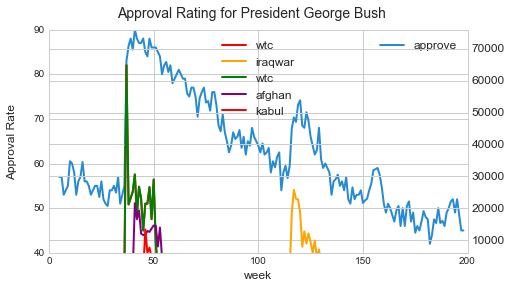

In [1266]:
fig = plt.figure(figsize=(7.5, 4))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1 = y.plot(ax=ax1)
ax2 = exogx.plot(ax=ax2, color=['red','orange','green','purple'])
fig.suptitle('Approval Rating for President George Bush', fontsize = 14)
plt.xlabel('Weeks', labelpad = 8, fontsize = 12)
plt.ylabel('Approval Rate', fontsize = 12)
ax2.yaxis.set_label_coords(-0.1,0.5)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
align_yaxis(ax1, 0, ax2, -50000)
ax1 = plt.legend(loc='upper center')
plt.show()

In [1316]:
y

,approve
week,
5.0,57.0
6.0,57.0
7.0,53.0
8.0,54.0
9.0,55.0
...,...
195.0,52.0
196.0,48.5
197.0,45.0


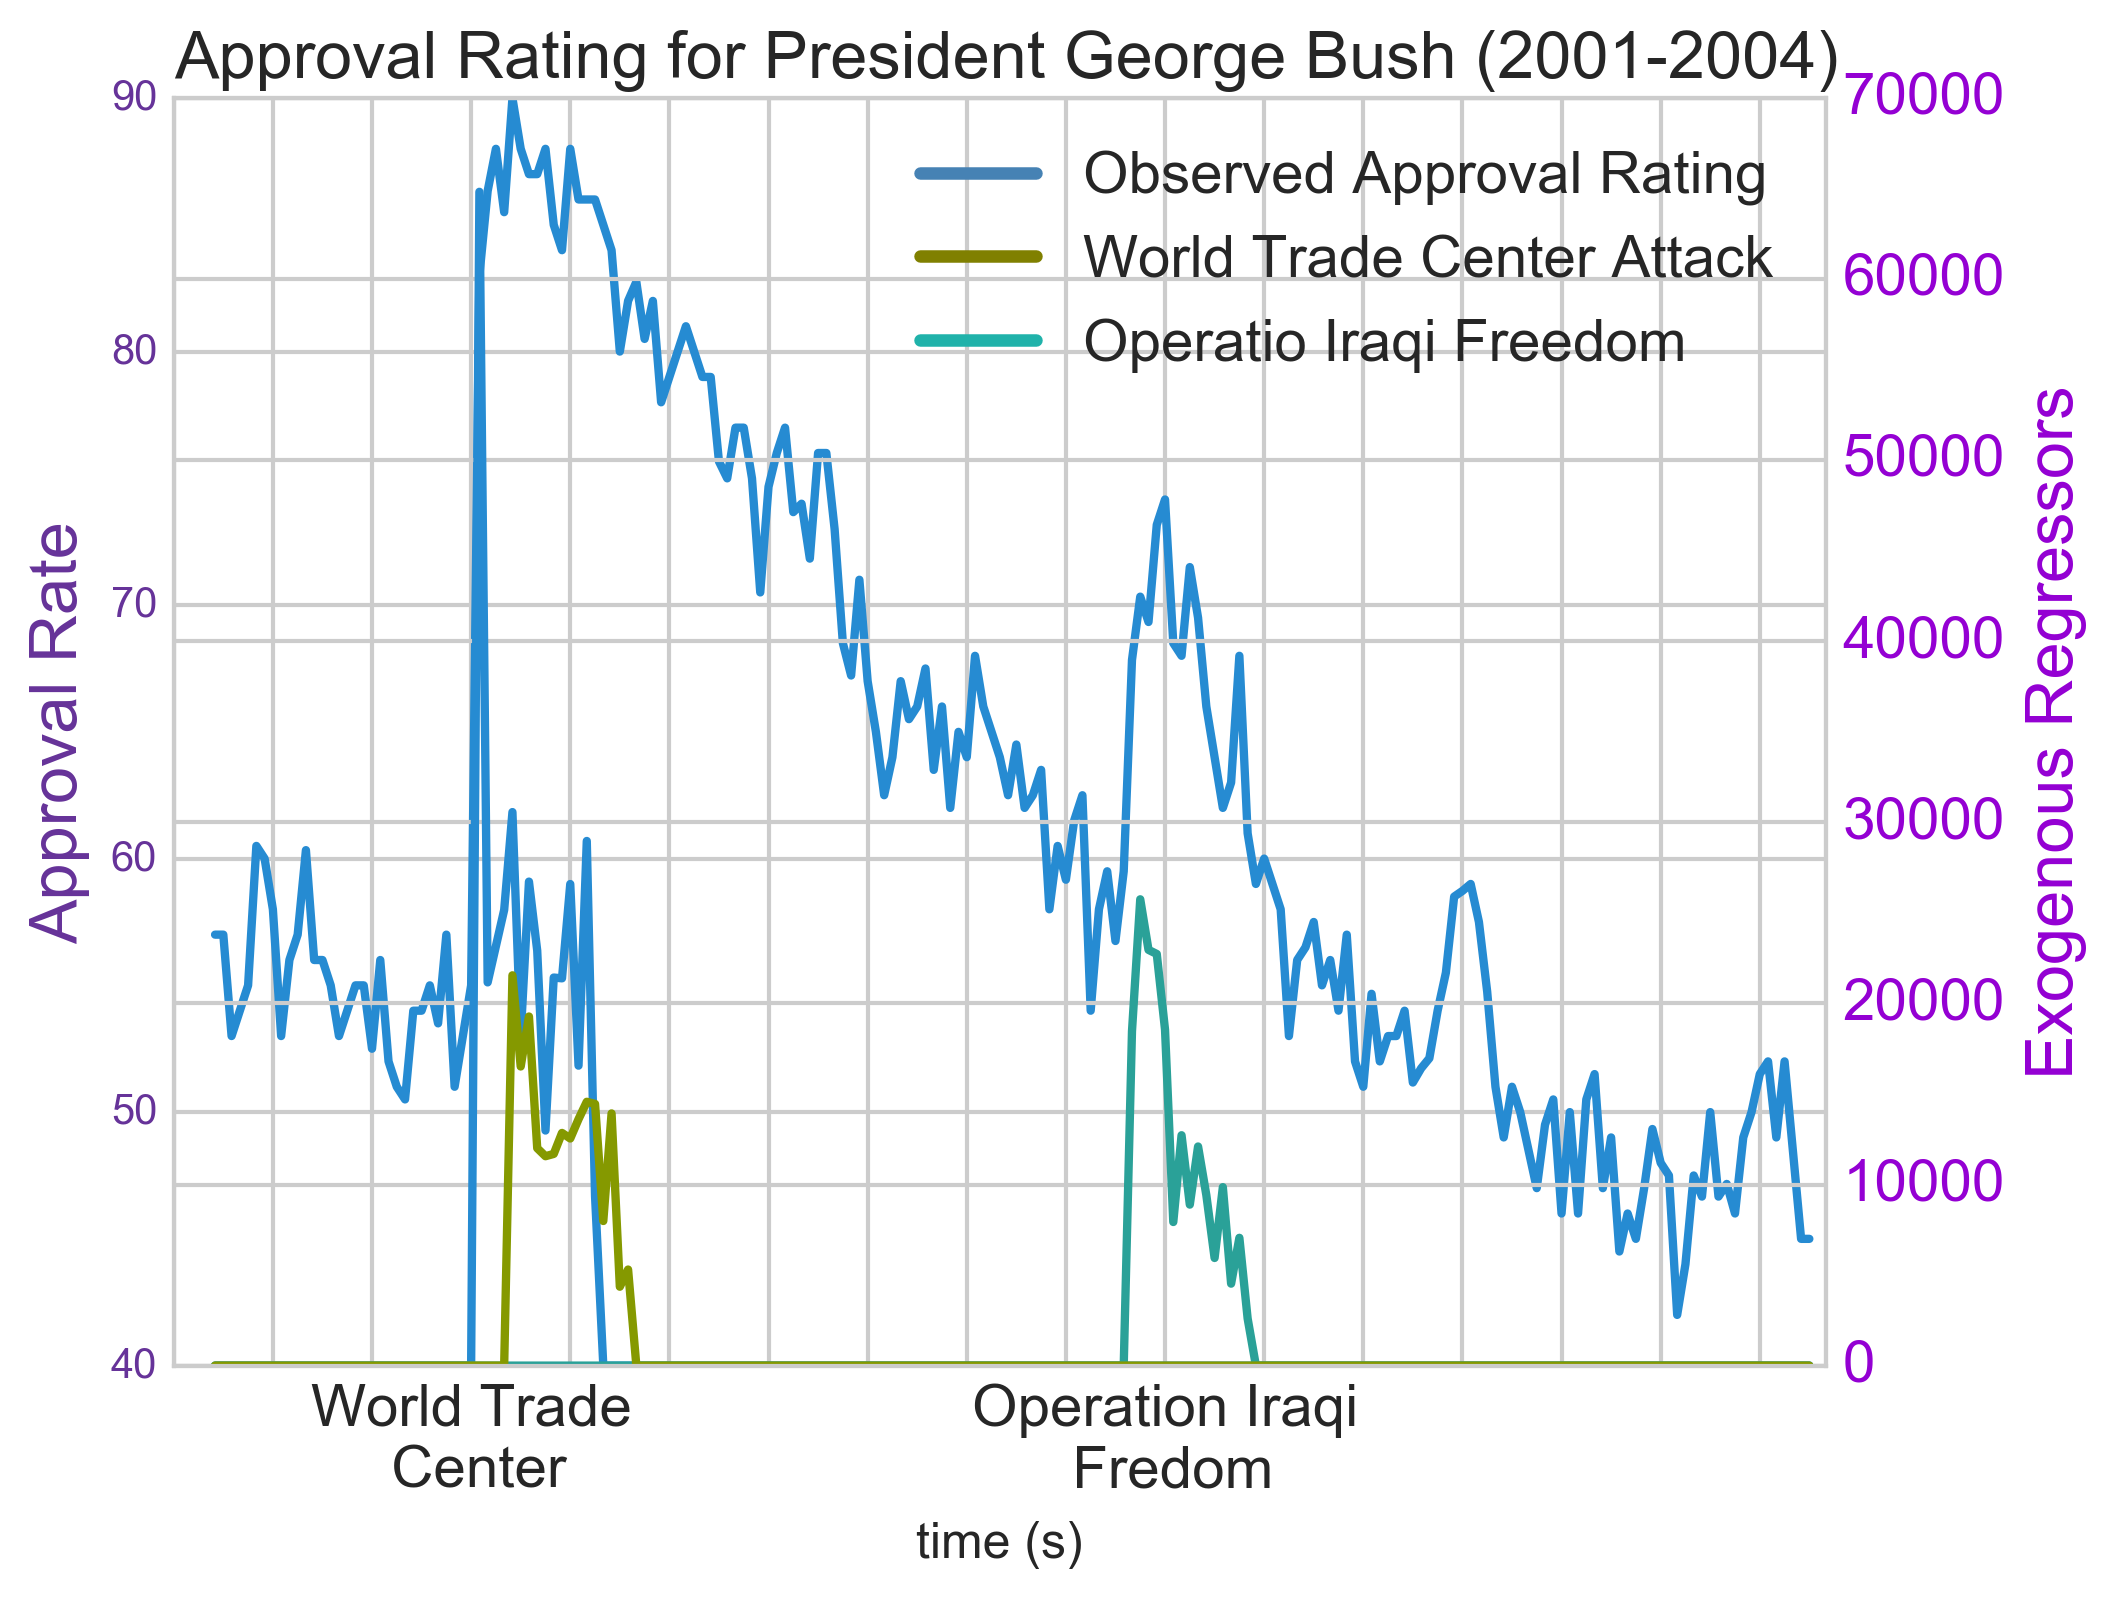

In [1412]:
#### %matplotlib inline
fig, ax1 = plt.subplots(figsize=(7, 5), dpi = 300)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Approval Rate', color='rebeccapurple', fontsize = 16)
ax1.plot(y)
ax1.tick_params(axis='y', labelcolor='rebeccapurple')

ax2=ax1.twinx()
ax2.set_ylabel('Exogenous Regressors', color='darkviolet', fontsize = 16)  
ax2.plot(exogx)
ax2.tick_params(axis='y', labelcolor='darkviolet')
fig.tight_layout() 
plt.title('Approval Rating for President George Bush (2001-2004)', fontsize = 16)
plt.xlabel('Weeks', labelpad = 8, fontsize = 14)

plt.xticks(np.arange(0, 200, 12))
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels[3] = 'World Trade\n Center'
labels[10] = 'Operation Iraqi\n Fredom'

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax1.set_xticklabels(labels, fontsize = 14)
plt.xlim(left=0)
plt.xlim(right=200)
colors = ['steelblue', 'olive', 'lightseagreen']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Observed Approval Rating', 'World Trade Center Attack', 'Operatio Iraqi Freedom']
plt.legend(lines, labels, prop={'size': 14})
plt.savefig('bush_new_ts.png', figsize=(7,5), dpi=300, bbox_inches='tight')
plt.show()

In [1344]:
y = df[["approve"]]
y.head(5), exogx

(      approve
 week         
 5.0      57.0
 6.0      57.0
 7.0      53.0
 8.0      54.0
 9.0      55.0,
        wtc  iraqwar  wtc  afghan  kabul
 week                                   
 5.0    0.0      0.0  0.0     0.0    0.0
 6.0    0.0      0.0  0.0     0.0    0.0
 7.0    0.0      0.0  0.0     0.0    0.0
 8.0    0.0      0.0  0.0     0.0    0.0
 9.0    0.0      0.0  0.0     0.0    0.0
 ...    ...      ...  ...     ...    ...
 195.0  0.0      0.0  0.0     0.0    0.0
 196.0  0.0      0.0  0.0     0.0    0.0
 197.0  0.0      0.0  0.0     0.0    0.0
 198.0  0.0      0.0  0.0     0.0    0.0
 NaN    NaN      NaN  NaN     NaN    NaN
 
 [195 rows x 5 columns])

In [12]:
sm.stats.acorr_ljungbox(df.ts, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,1335.482751,8.402968e-281


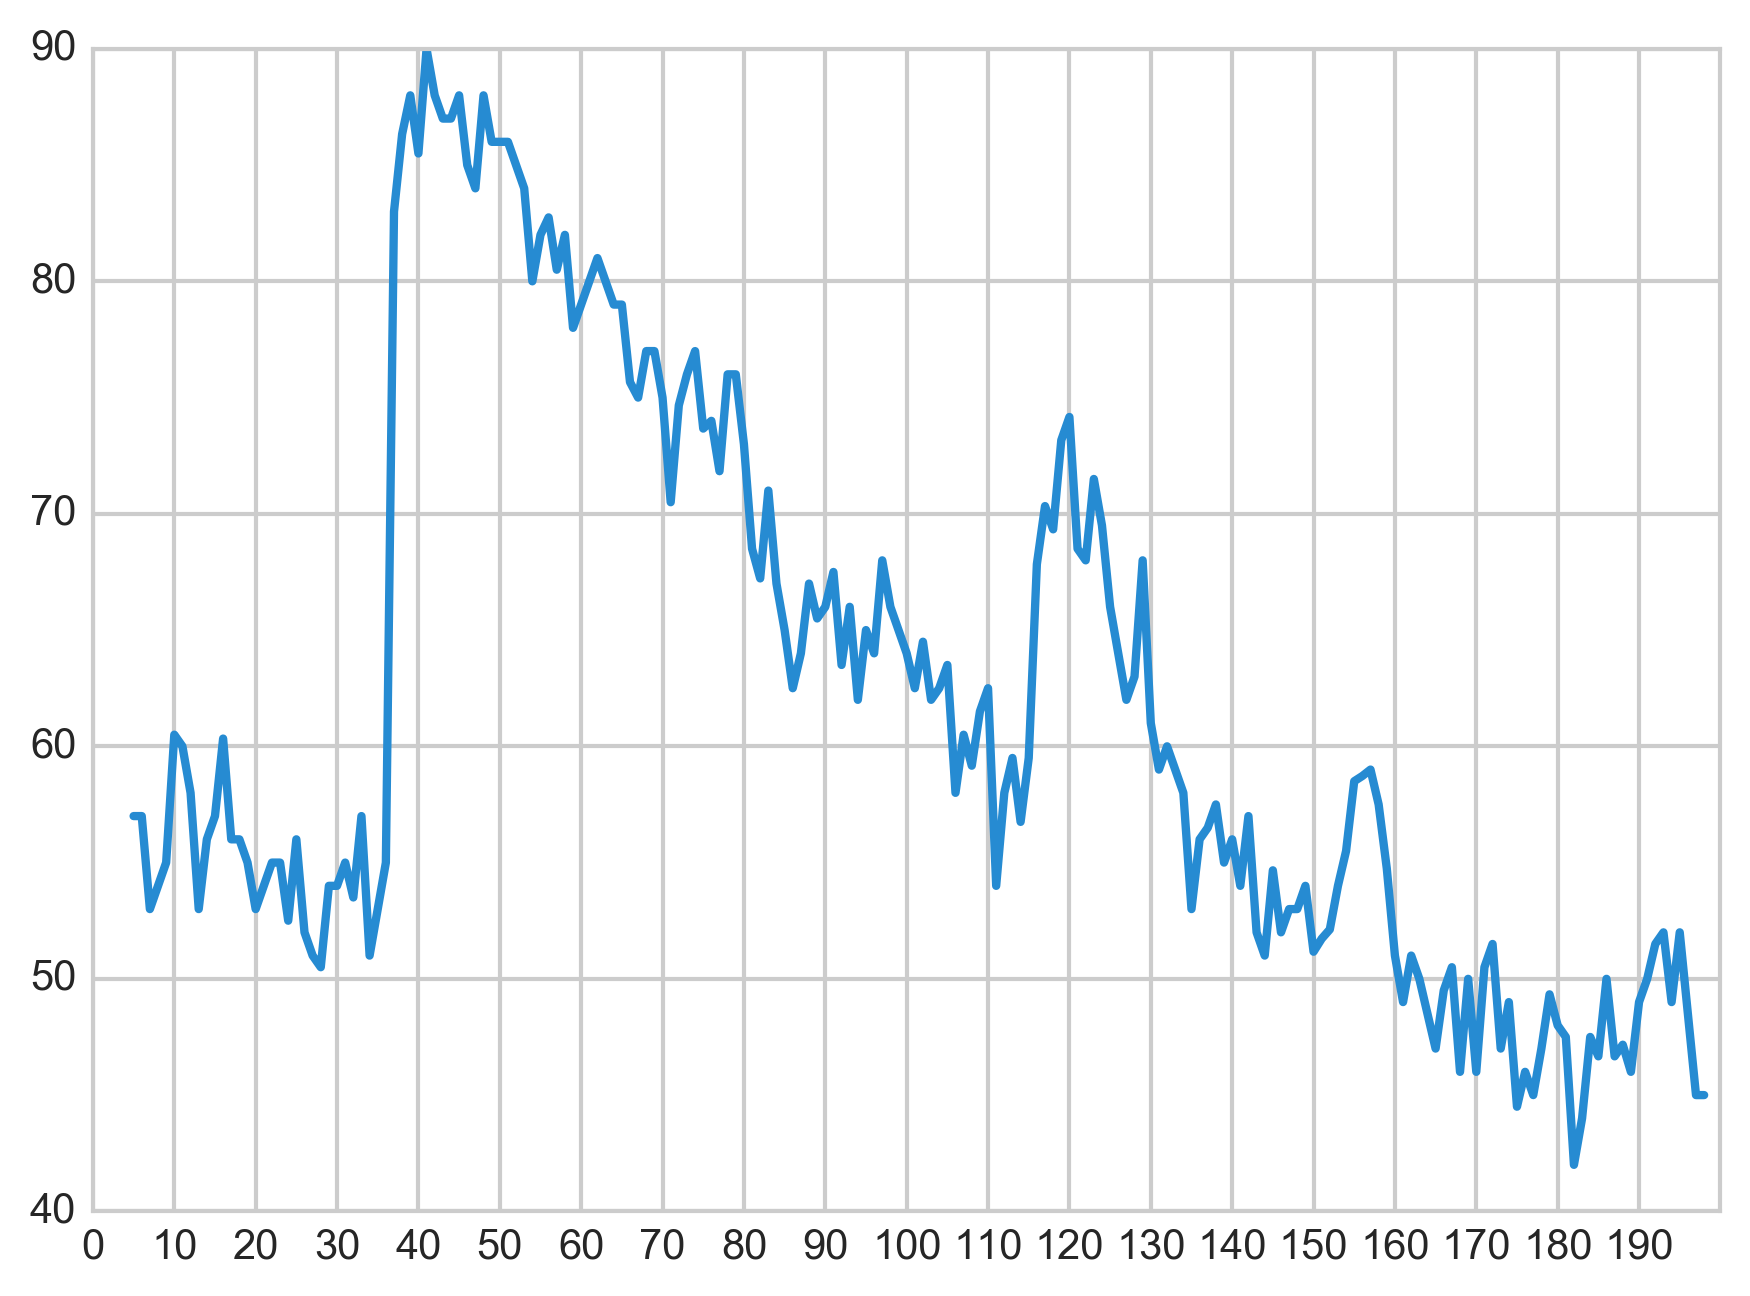

In [1447]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 5), dpi = 300)
ax.plot(y)
#y.plot(figsize=(12,8))
plt.xticks(np.arange(0, 200, 10))
labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Start'
labels[4] = 'World Trade\n Center'
#labels[10] = 'Operation Iraqi\n Fredom'
#labels[16] = 'End'
plt.savefig('bush_app_plt.png', figsize=(7,5), dpi=300, bbox_inches='tight')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'fit_exog'

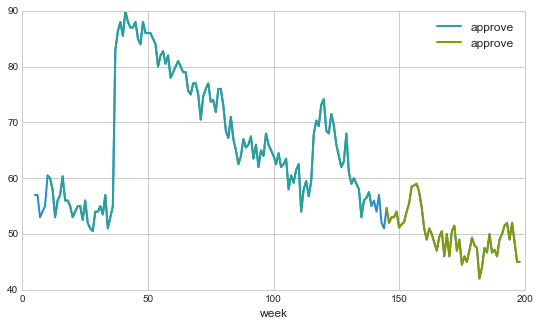

In [1459]:
from matplotlib.lines import Line2D
%matplotlib inline

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(y)
ax = yt[5:135].plot(ax=ax)
ax = yv[5:135].plot(ax=ax)
ax.fit_exog.plot_predict(5, 155, exog =trn, dynamic=True, ax=ax, plot_insample=False)
plt.title('Approval Rating for President George Bush', fontsize = 16)
plt.xlabel('Weeks', labelpad = 8, fontsize = 14)
plt.ylabel('Approval Rate', fontsize = 14)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[2] = 'World Trade\n Center'
labels[6] = 'Operation Iraqi\n Fredom'
labels[9] = 'Forecast'
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_xticklabels(labels)
colors = ['cornflowerblue', 'orangered', 'mediumpurple','gray']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Forecated Approval Rating', 'Observed Approval Ratings', 'Exogenous Regressors','95% Confidence Interval']
plt.legend(lines, labels, prop={'size': 14})
plt.show()

In [14]:
sm.stats.durbin_watson(df.ts)

array([0.00288214])

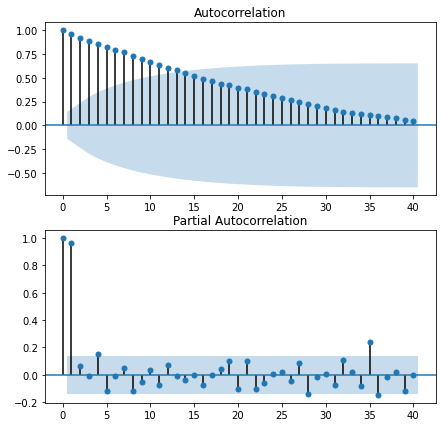

In [15]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.ts.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.ts, lags=40, ax=ax2)

In [16]:
df.ts

,approve
week,
5,57.0
6,57.0
7,53.0
8,54.0
9,55.0
...,...
194,49.0
195,52.0
196,48.5


<Figure size 1800x2400 with 0 Axes>

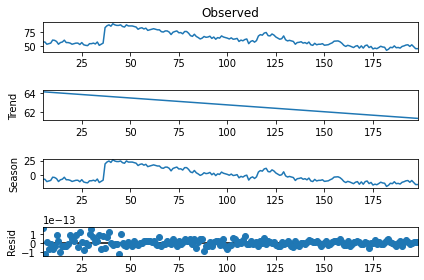

In [17]:
from statsmodels.tsa.seasonal import STL
res = STL(df.ts, seasonal=13, period = 180).fit()
plt.figure(figsize=(6,8), dpi=300)
res.plot()
plt.savefig('bush_seas.png', figsize=(3,5), dpi=300, bbox_inches='tight')
plt.show()


Text(0, 0.5, 'Approval Ratings')

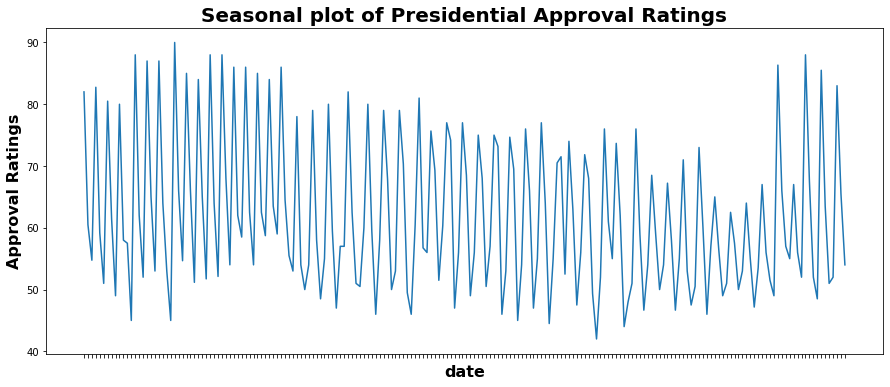

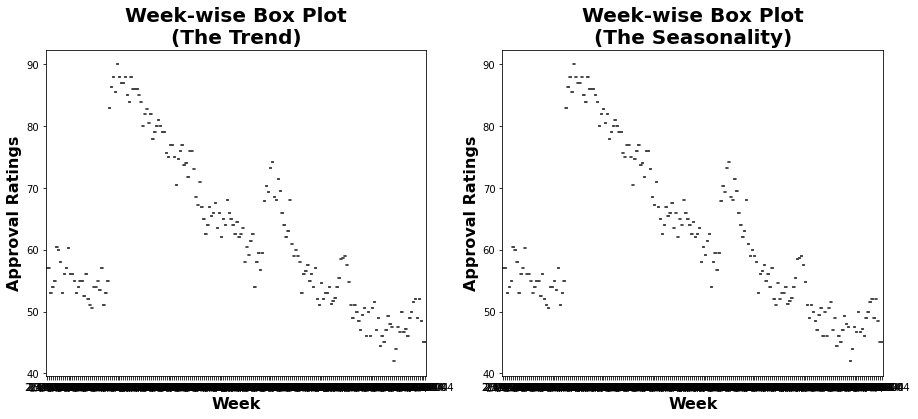

In [18]:
import seaborn as sns 
variable = 'approve'
fig, ax = plt.subplots(figsize=(15, 6))
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(df['date'], df[variable])
plt.title('Approval Rating for President George Bush', fontsize = 16)
plt.savefig('bush_seas_bx.png', figsize=(4,3), dpi=300, bbox_inches='tight')
ax.set_title('Seasonal plot of Presidential Approval Ratings', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Approval Ratings', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_xticklabels([])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(df['date'], df[variable], ax=ax[0])
ax[0].set_title('Week-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Approval Ratings', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(df['date'], df[variable], ax=ax[1])
ax[1].set_title('Week-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Approval Ratings', fontsize = 16, fontdict=dict(weight='bold'))

In [19]:
df1= pd.read_csv("D:\\Documents\\DATA\\bushjobm.csv")
df1.columns
df1.set_index('week', inplace=True)
df1.ts = df1[["approve"]]
exogx1 = df1[["iraqwar","wtc","afghan","kabul"]]

<ipython-input-19-bcdd3b2d4197>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.ts = df1[["approve"]]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

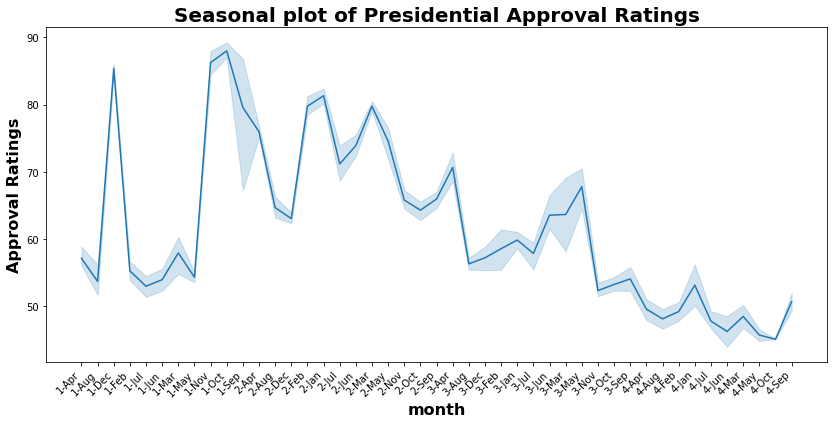

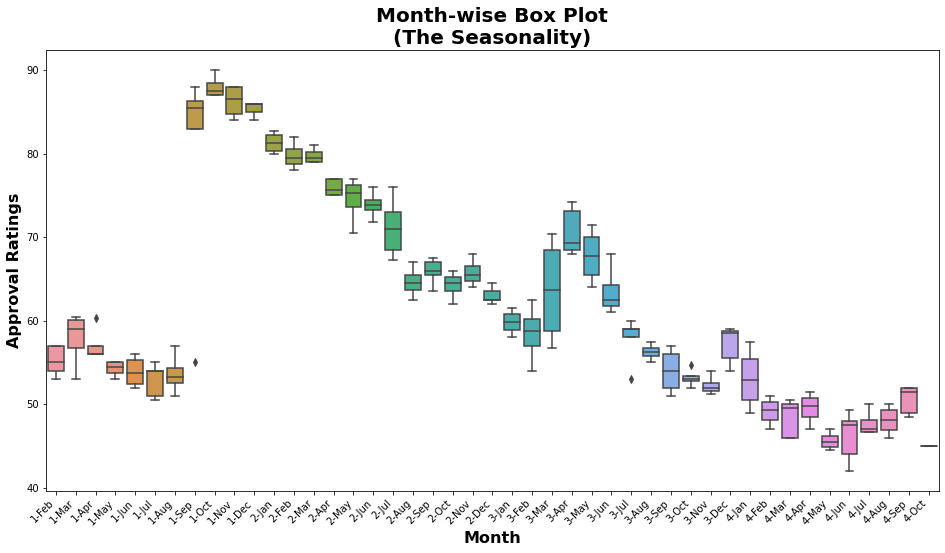

In [20]:
import seaborn as sns 
variable = 'approve'
fig, ax = plt.subplots(figsize=(14, 6))
plt.subplots_adjust(top = 0.9)
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(df['month'], df[variable])
plt.title('Approval Rating for President George Bush', fontsize = 16)
plt.savefig('bush_seas_bx.png', figsize=(4,3), dpi=300, bbox_inches='tight')
ax.set_title('Seasonal plot of Presidential Approval Ratings', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Approval Ratings', fontsize = 16, fontdict=dict(weight='bold'))
plt.xticks(rotation=45, ha='right')

fig, ax = plt.subplots(figsize=(16, 7))

sns.boxplot(df['month'], df[variable], ax=ax)
plt.subplots_adjust(top = 1)
ax.set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Approval Ratings', fontsize = 16, fontdict=dict(weight='bold'))
plt.xticks(rotation=45, ha='right')

Text(0, 0.5, 'Approval Ratings')

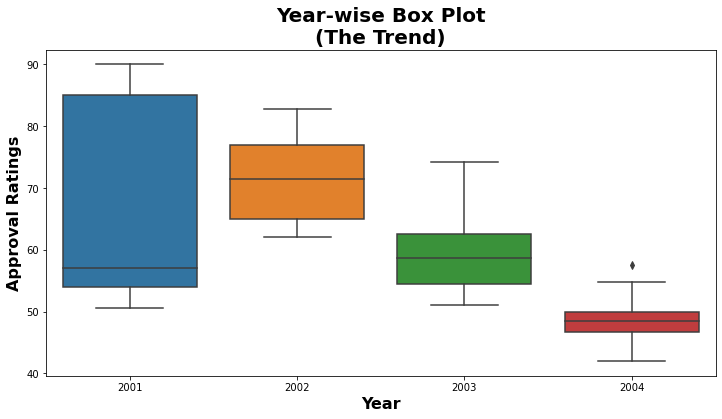

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(df['year'], df[variable], ax=ax)
ax.set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Approval Ratings', fontsize = 16, fontdict=dict(weight='bold'))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

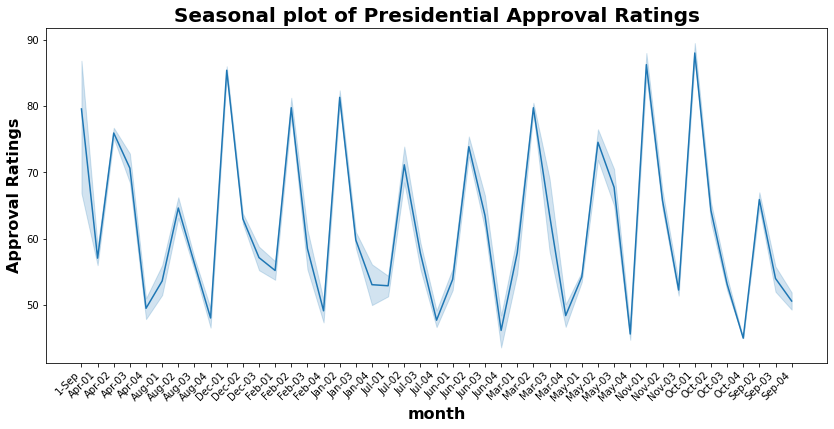

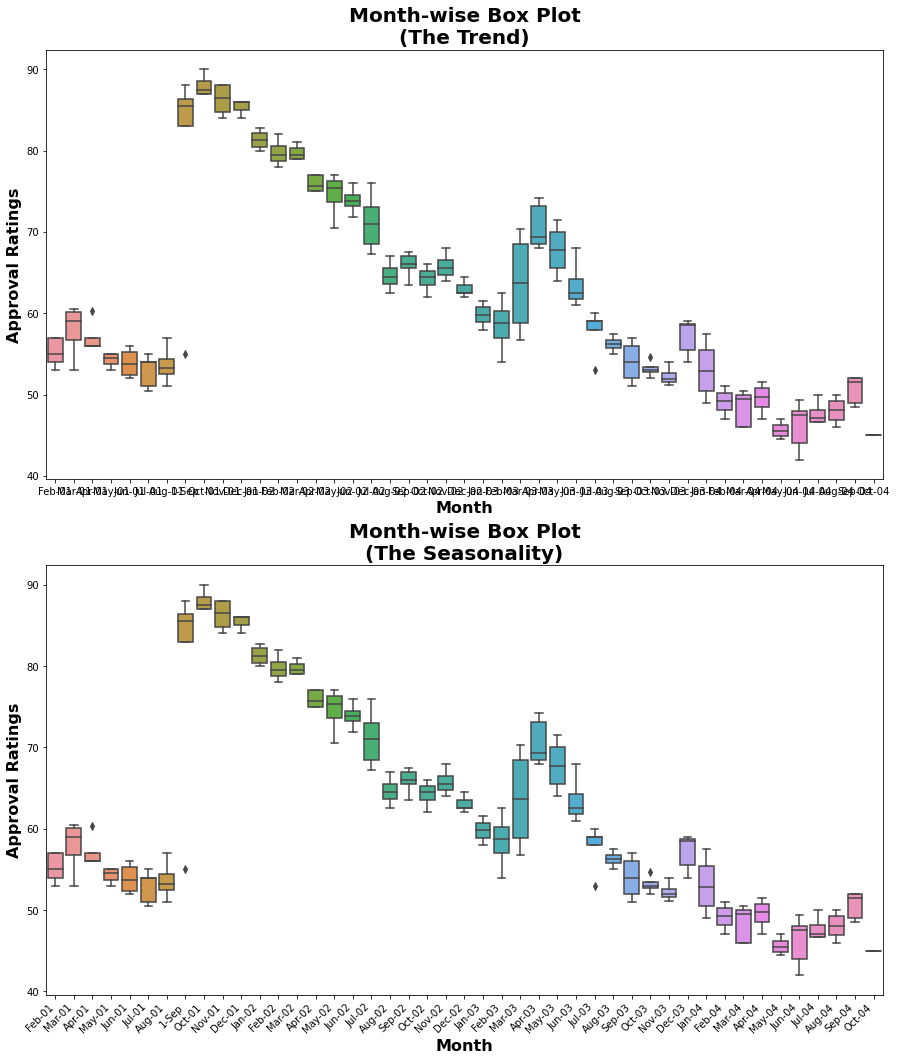

In [687]:
import seaborn as sns 
variable = 'approve'
fig, ax = plt.subplots(figsize=(14, 6))
plt.subplots_adjust(top = 0.9)
palette = sns.color_palette("ch:2.5,-.2,dark=.3", 10)
sns.lineplot(df['month'], df[variable])
plt.title('Approval Rating for President George Bush', fontsize = 16)
plt.savefig('bush_seas_bx.png', figsize=(4,3), dpi=300, bbox_inches='tight')
ax.set_title('Seasonal plot of Presidential Approval Ratings', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Approval Ratings', fontsize = 16, fontdict=dict(weight='bold'))
plt.xticks(rotation=45, ha='right')

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

sns.boxplot(df['month'], df[variable], ax=ax[0])
plt.subplots_adjust(top = 0.9)
plt.xticks(rotation=45, ha='right')
ax[0].set_title('Month-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Approval Ratings', fontsize = 16, fontdict=dict(weight='bold'))
plt.xticks(rotation=45, ha='right')

sns.boxplot(df['month'], df[variable], ax=ax[1])
plt.subplots_adjust(top = 1)
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Approval Ratings', fontsize = 16, fontdict=dict(weight='bold'))
plt.xticks(rotation=45, ha='right')

In [620]:
arma_mod_1 = sm.tsa.ARIMA(df.ts, order=(0,0,1))
arma_res_1 = arma_mod_1.fit(trend='c', disp=1)
print(arma_res_1.summary())

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                              ARMA Model Results                              
Dep. Variable:                approve   No. Observations:                  194
Model:                     ARMA(0, 1)   Log Likelihood                -667.951
Method:                       css-mle   S.D. of innovations              7.550
Date:                Sun, 01 Nov 2020   AIC                           1341.902
Time:                        17:31:29   BIC                           1351.706
Sample:                             0   HQIC                          1345.872
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            61.9298      0.967     64.025      0.000      60.034      63.826
ma.L1.approve     0.7884      0.033     24.248      0.000       0.725       0.852
                                    Root

In [252]:
resid_opt_1 = arma_res_1.resid

In [972]:
arma_mod_2 = sm.tsa.ARIMA(df.ts, order=(1,0,0))
arma_res_2 = arma_mod_2.fit(trend='nc', disp=1)
resid_opt_2 = arma_res_2.resid

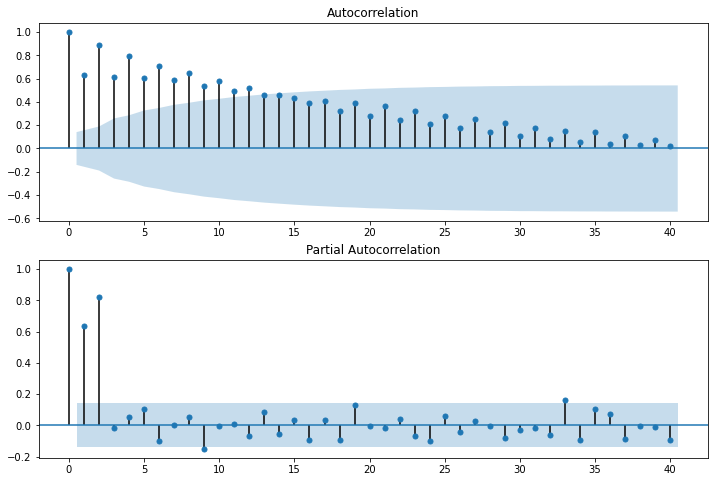

In [973]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid_opt_1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid_opt_1, lags=40, ax=ax2)

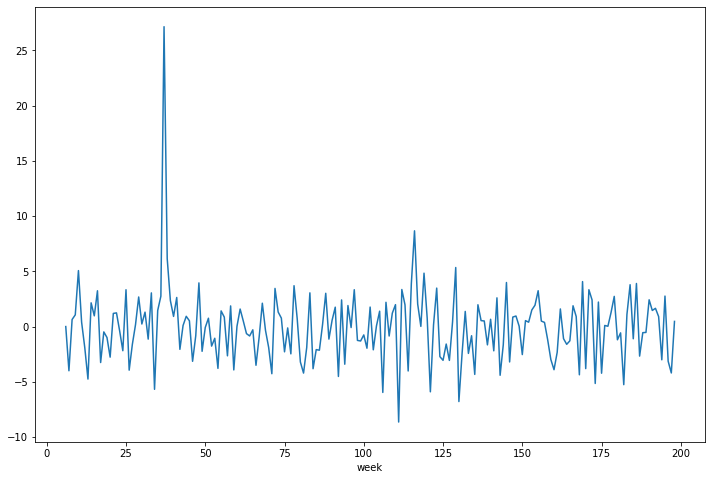

In [255]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_res_2.resid.plot(ax=ax);

In [256]:
print(arma_res_2.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.approve   No. Observations:                  193
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -506.419
Method:                       css-mle   S.D. of innovations              3.336
Date:                Sun, 01 Nov 2020   AIC                           1026.838
Time:                        10:02:45   BIC                           1049.677
Sample:                             1   HQIC                          1036.087
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ar.L1.D.approve    -0.0793      0.072     -1.106      0.269      -0.220       0.061
ar.L2.D.approve     0.0013      0.072      0.018      0.986      -0.140       0.143
ar.L3.D.approve    -0.1383      

In [257]:
arma_mod_3 = sm.tsa.ARIMA(df.ts, (3,0,0)).fit()
arma_resid_3 = arma_mod_3.resid
predict_approval_3 = arma_mod_3.predict(194, 198, dynamic=True)

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [258]:
df.ts[194:]

Series([], Name: approve, dtype: float64)

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


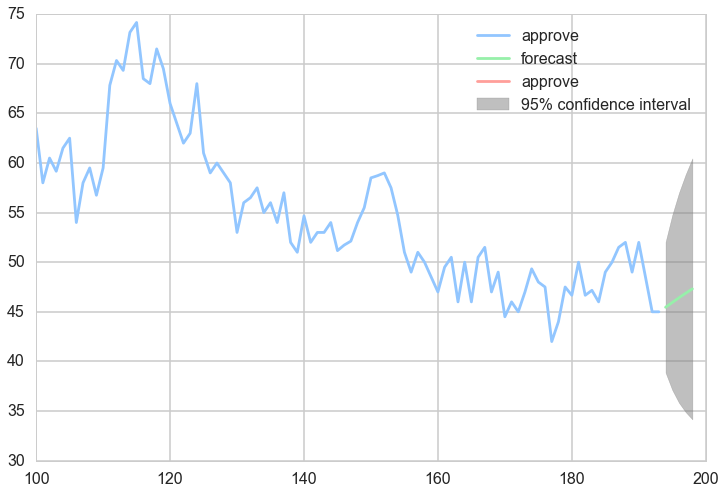

In [1080]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = df.ts[100:].plot(ax=ax)
fig = arma_mod_3.plot_predict(194, 198, dynamic=True, ax=ax, plot_insample=True)

In [260]:
print(arma_mod_3.summary())

                              ARMA Model Results                              
Dep. Variable:                approve   No. Observations:                  194
Model:                     ARMA(3, 0)   Log Likelihood                -511.492
Method:                       css-mle   S.D. of innovations              3.357
Date:                Sun, 01 Nov 2020   AIC                           1032.985
Time:                        10:03:07   BIC                           1049.324
Sample:                             0   HQIC                          1039.601
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            59.5526      5.909     10.077      0.000      47.970      71.135
ar.L1.approve     0.8920      0.071     12.482      0.000       0.752       1.032
ar.L2.approve     0.0931      0.096     

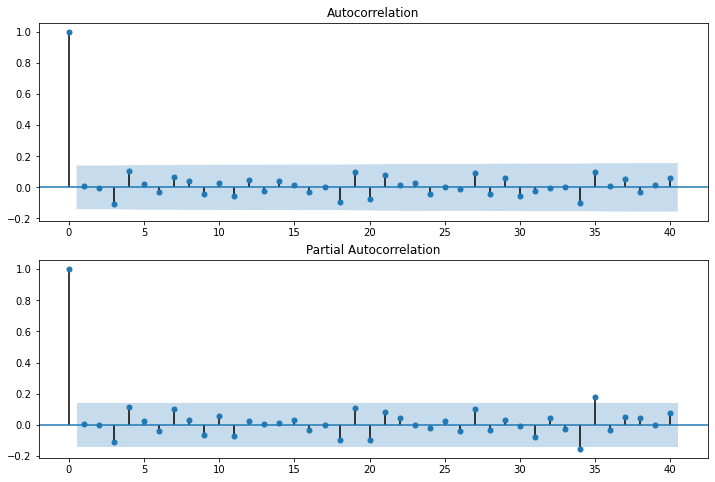

In [261]:
resid_opt_3 = arma_mod_3.resid
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid_opt_3.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid_opt_3, lags=40, ax=ax2)

In [72]:
test = np.array(predict_approval_3)
test.shape

(5,)

In [85]:
bx = arma_mod_3.resid[189:]
bx.shape

(5,)

In [86]:
MAPE(bx, test)

104.03241092184908

In [22]:
exog1 = df[["wtc","iraqwar"]]
#exog1.head(33)

In [23]:
#df.exog1 = df[["wtc","iraqwar"]]
#print(df.exog1)

In [24]:
df.exog2 = df[["approve","wtc","iraqwar"]]
print(df.exog2)

      approve  wtc  iraqwar
week                       
5        57.0    0        0
6        57.0    0        0
7        53.0    0        0
8        54.0    0        0
9        55.0    0        0
...       ...  ...      ...
194      49.0    0        0
195      52.0    0        0
196      48.5    0        0
197      45.0    0        0
198      45.0    0        0

[194 rows x 3 columns]


<ipython-input-24-c3469cd91bd9>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.exog2 = df[["approve","wtc","iraqwar"]]


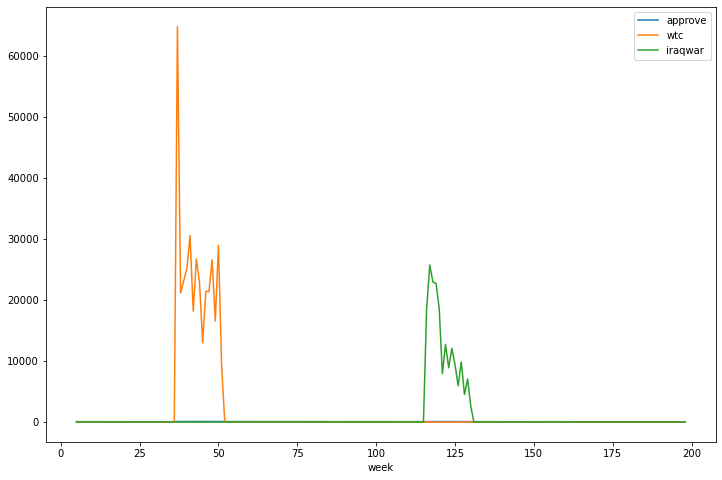

In [25]:
%matplotlib inline
df.exog2.plot(figsize=(12,8));

In [27]:
#creating the train and validation set
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

# Vector Autoregression (VAR)

In [1250]:
df = pd.read_csv("D:\\Documents\\DATA\\bushapprove.csv")
dfts = df.set_index('week', inplace=True)
y = df[["approve"]]
exogx = df[["approve","wtc","iraqwar","afghan"]]
exogx2 = df[["wtc","iraqwar","afghan","kabul"]]
df.tail()

,date,approve,wtc,afghan,kabul,iraqwar,early,bd,nn,adj_app,...,unoccupy,igc,unhq,italian,saddam,prisoner,uniraq,karzai,obs,rdpipc
week,,,,,,,,,,,,,,,,,,,,,
194,9/15/2004,49.0,0,0,0,0,0,14,7,17.367218,...,0,0,0,0,0,0,0,0,190,NaN
195,9/22/2004,52.0,0,0,0,0,0,14,7,20.364848,...,0,0,0,0,0,0,0,0,191,NaN
196,9/29/2004,48.5,0,0,0,0,0,11,7,16.867613,...,0,0,0,0,0,0,0,0,192,NaN
197,10/6/2004,45.0,0,0,0,0,0,19,7,13.370377,...,0,0,0,0,0,0,0,0,193,NaN
198,10/13/2004,45.0,0,0,0,0,0,4,1,13.370377,...,0,0,0,0,0,0,0,0,194,NaN


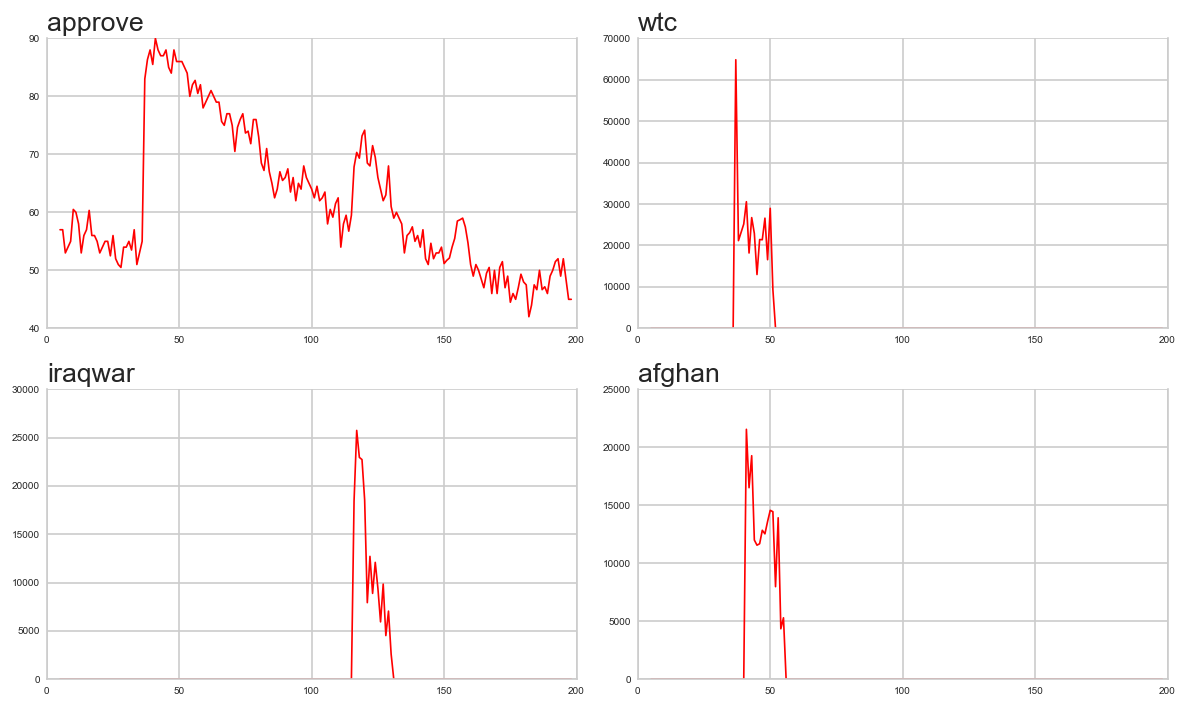

In [1251]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = exogx[exogx.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(exogx.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [1253]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(exogx, variables = exogx.columns) 

,approve_x,wtc_x,iraqwar_x,afghan_x
approve_y,1.0000,0.0323,0.2909,0.7833
wtc_y,0.1603,1.0000,0.6801,0.0113
iraqwar_y,0.0343,0.8239,1.0000,0.8141
afghan_y,0.0000,0.0000,0.7884,1.0000


In [1254]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(exogx)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
approve ::  128.36    > 40.1749   =>   True
wtc    ::  26.88     > 24.2761   =>   True
iraqwar ::  9.02      > 12.3212   =>   False
afghan ::  0.3       > 4.1296    =>   False


Split the Series into Training and Testing Data

Splitting the dataset into training and test data.

The VAR model will be fitted on df_train and then used to forecast the next 4 observations. These forecasts will be compared against the actuals present in test data.

To do the comparisons, we will use multiple forecast accuracy metrics, as seen later in this article.

In [1255]:
nobs = 12
df_train, df_test = exogx[0:-nobs], exogx[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(182, 4)
(12, 4)


In [1011]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [984]:
def adjust(val, length= 6): return str(val).ljust(length)

In [985]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "approve" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8169
 No. Lags Chosen       = 0
 Critical value 1%     = -3.467
 Critical value 5%     = -2.878
 Critical value 10%    = -2.575
 => P-Value = 0.3721. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "iraqwar" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9398
 No. Lags Chosen       = 4
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0409. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "wtc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationar

In [986]:
df_differenced = df_train.diff().dropna()

In [987]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "approve" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.4984
 No. Lags Chosen       = 0
 Critical value 1%     = -3.467
 Critical value 5%     = -2.878
 Critical value 10%    = -2.575
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "iraqwar" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7563
 No. Lags Chosen       = 3
 Critical value 1%     = -3.468
 Critical value 5%     = -2.878
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "wtc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    =

In [988]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [989]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "approve" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.4918
 No. Lags Chosen       = 8
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "iraqwar" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.2398
 No. Lags Chosen       = 9
 Critical value 1%     = -3.469
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "wtc" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 

In [1012]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  66.3425194827873
BIC :  66.87671822119637
FPE :  6.489999807990071e+28
HQIC:  66.55913284769767 

Lag Order = 2
AIC :  65.66052533726815
BIC :  66.64366070393145
FPE :  3.283569912732544e+28
HQIC:  66.05921311418422 

Lag Order = 3
AIC :  65.0428443091427
BIC :  66.47839221087098
FPE :  1.7734663524487367e+28
HQIC:  65.62504678147795 

Lag Order = 4
AIC :  63.84940972353935
BIC :  65.74089165239734
FPE :  5.394195422196716e+27
HQIC:  64.61658542264182 

Lag Order = 5
AIC :  62.834184537697624
BIC :  65.18516840404081
FPE :  1.9649479407478604e+27
HQIC:  63.7878105527003 

Lag Order = 6
AIC :  60.71243678999485
BIC :  63.526537774927334
FPE :  2.3736810150692627e+26
HQIC:  61.85400908405906 

Lag Order = 7
AIC :  58.33635419464615
BIC :  61.6172356224473
FPE :  2.2312649013218915e+25
HQIC:  59.667387927744834 

Lag Order = 8
AIC :  54.87396427135507
BIC :  58.625338502440876
FPE :  7.108280803592363e+23
HQIC:  56.39599412974654 

Lag Order = 9
AIC :  -67.40245627176

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [ ]:
x = model.select_order(maxlags=12)
x.summary()

In [ ]:
model_fitted = model.fit(4)
model_fitted.summary()

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
for col, val in zip(dfts.columns, out):
    print(adjust(col), ':', round(val, 2))

In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=dfts.index[-nobs:], columns=dfts.columns + '_2d')
df_forecast

In [994]:
df_differenced

,approve,iraqwar,wtc,afghan,kabul
2,-4.000000,0.0,0.0,0.0,0.0
3,5.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0
5,4.500000,0.0,0.0,0.0,0.0
6,-6.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...
177,-5.000000,0.0,0.0,0.0,0.0
178,7.500000,0.0,0.0,0.0,0.0
179,1.500000,0.0,0.0,0.0,0.0
180,-4.333332,0.0,0.0,0.0,0.0


In [1019]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [1020]:
df_results

,approve_2d,iraqwar_2d,wtc_2d,afghan_2d,kabul_2d,approve_1d,approve_forecast,iraqwar_1d,iraqwar_forecast,wtc_1d,wtc_forecast,afghan_1d,afghan_forecast,kabul_1d,kabul_forecast
182,-3.947157,1266.219030,-2447.469069,391.381492,-164.498560,-0.613824,49.386176,1266.219030,1266.219030,-2447.469069,-2447.469069,391.381492,391.381492,-164.498560,-164.498560
183,2.813407,-954.328035,4605.587865,-203.992223,175.457183,2.199583,51.585758,311.890995,1578.110025,2158.118796,-289.350273,187.389269,578.770761,10.958622,-153.539938
184,-1.154983,-87.598577,-3689.424765,6.628537,-103.855281,1.044600,52.630358,224.292418,1802.402443,-1531.305970,-1820.656243,194.017806,772.788567,-92.896658,-246.436596
185,0.605582,499.573184,1985.731691,127.799023,-30.484945,1.650182,54.280540,723.865602,2526.268046,454.425722,-1366.230521,321.816829,1094.605397,-123.381603,-369.818199
186,-0.398689,-863.046888,-1529.976006,-768.411265,30.022614,1.251493,55.532033,-139.181286,2387.086760,-1075.550284,-2441.780805,-446.594436,648.010960,-93.358988,-463.177187
187,-0.139859,929.120927,1333.519132,1217.887752,67.750223,1.111634,56.643667,789.939641,3177.026401,257.968848,-2183.811957,771.293315,1419.304276,-25.608765,-488.785952
188,0.249319,-450.262649,-853.871463,-1031.222092,-21.216126,1.360953,58.004620,339.676992,3516.703394,-595.902615,-2779.714572,-259.928776,1159.375499,-46.824891,-535.610843
189,-0.026782,46.184901,443.223030,844.712100,-27.748911,1.334171,59.338791,385.861893,3902.565287,-152.679585,-2932.394157,584.783324,1744.158823,-74.573802,-610.184645
190,0.045899,215.627286,111.146987,-738.212529,58.724222,1.380070,60.718861,601.489180,4504.054467,-41.532598,-2973.926754,-153.429205,1590.729618,-15.849580,-626.034225
191,-0.059425,-423.963481,-590.571715,396.116751,-304.812478,1.320645,62.039506,177.525699,4681.580166,-632.104313,-3606.031067,242.687545,1833.417163,-320.662058,-946.696283


In [1021]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['approve_forecast', 'iraqwar_forecast', 'wtc_forecast', 'afghan_forecast',
                   'kabul_forecast']]

,approve_forecast,iraqwar_forecast,wtc_forecast,afghan_forecast,kabul_forecast
182,47.410086,1100.878279,-2088.798369,-3.939873e-13,-6.405532e-13
183,48.546544,1518.629955,-902.220640,-2.704697e-12,-1.899956e-12
184,46.657151,620.701320,-4470.444110,-2.517275e-12,-4.785948e-13
185,46.237222,910.919995,-2861.915956,-3.356552e-12,3.320990e-13
186,46.867785,336.656533,-2811.542096,-6.945476e+02,1.724429e-12
187,47.197412,170.787319,-1585.561425,-6.054876e+02,3.027185e-12
188,48.685130,1095.256359,-2488.095868,-1.891819e+03,3.047925e-12
189,48.609591,542.751953,-3756.316287,-1.642422e+03,4.225353e-12
190,48.644623,934.118895,-3166.892049,-1.758843e+03,4.546373e-12
191,48.861766,1001.783594,-3451.101053,-1.084832e+03,-4.286185e+02


In [1022]:
193 - len(df_train)

11

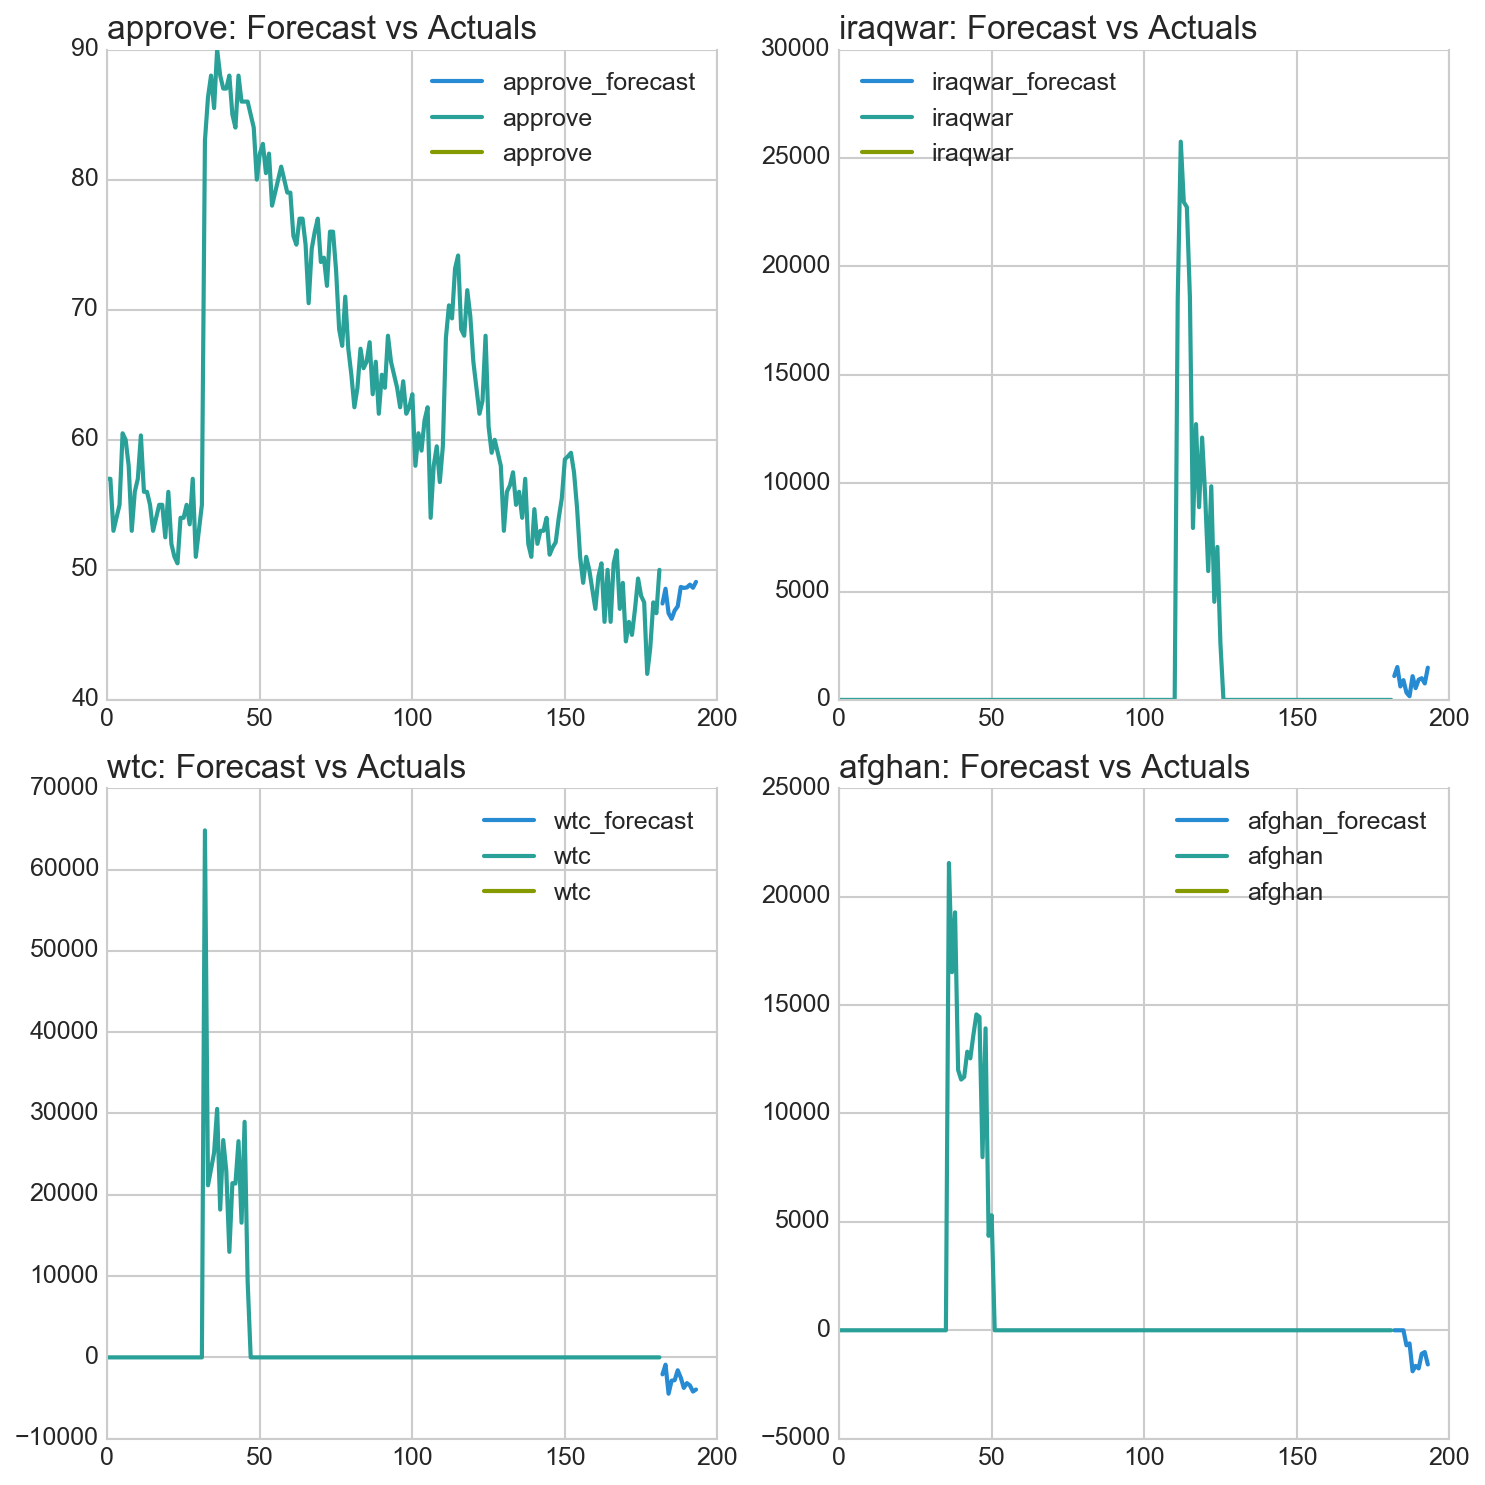

In [1031]:
fig, axes = plt.subplots(nrows=int(len(dfts.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(dfts.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=False)
    df_train[col][0:].plot(legend=True, ax=ax)
    df_test[col][len(df_test):].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=12)
plt.savefig('bush_new_VAR.png', figsize=(10,10), dpi=300, bbox_inches='tight')
plt.tight_layout();

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: approve')
accuracy_prod = forecast_accuracy(df_results['approve_forecast'].values, df_test['approve'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: iraqwar')
accuracy_prod = forecast_accuracy(df_results['iraqwar_forecast'].values, df_test['iraqwar'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: wtc')
accuracy_prod = forecast_accuracy(df_results['wtc_forecast'].values, df_test['wtc'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: afghan')
accuracy_prod = forecast_accuracy(df_results['afghan_forecast'].values, df_test['afghan'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: kabul')
accuracy_prod = forecast_accuracy(df_results['kabul_forecast'].values, df_test['kabul'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

In [386]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(trn)

In [387]:
results = model.fit()
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Nov, 2020
Time:                     13:55:53
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    65.4093
Nobs:                     134.000    HQIC:                   65.0242
Log likelihood:          -5259.65    FPE:                1.33438e+28
AIC:                      64.7605    Det(Omega_mle):     1.07192e+28
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         5.683736         2.456337            2.314           0.021
L1.y1         0.911916         0.037854           24.090           0.000
L1.y2         0.000010         0.000070            0.145           0.885
L1.y3         0.000090

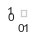

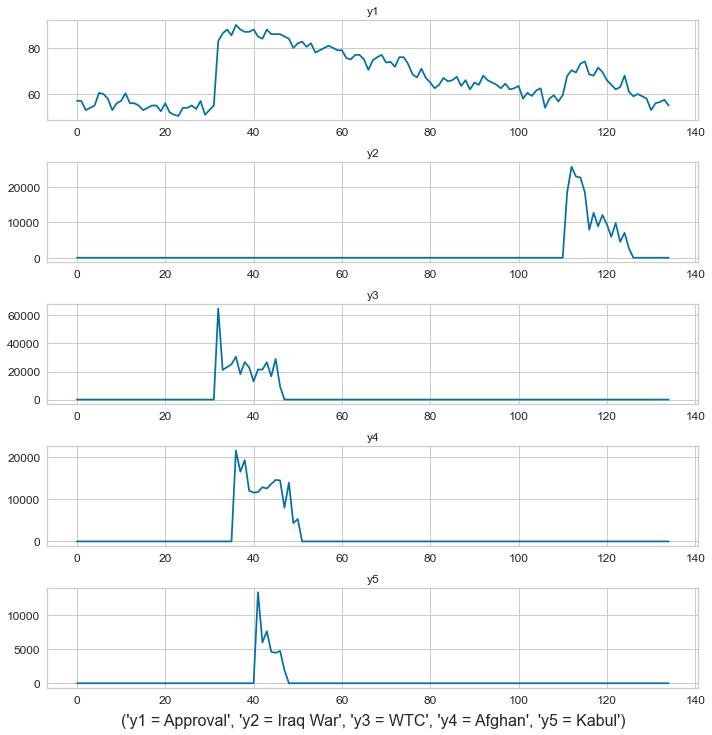

In [388]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(0.1,0.1))
ax = results.plot()
ax = plt.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.xlabel(('y1 = Approval','y2 = Iraq War','y3 = WTC','y4 = Afghan','y5 = Kabul'), labelpad = 8, fontsize = 16)
plt.savefig('bush_multivar.png', figsize=(4.5,8), dpi=150, bbox_inches='tight')
plt.show()

In [389]:
#plt.style.use('seaborn-pastel')
#results.plot()

In [392]:
irf = results.irf(10)
print(irf)

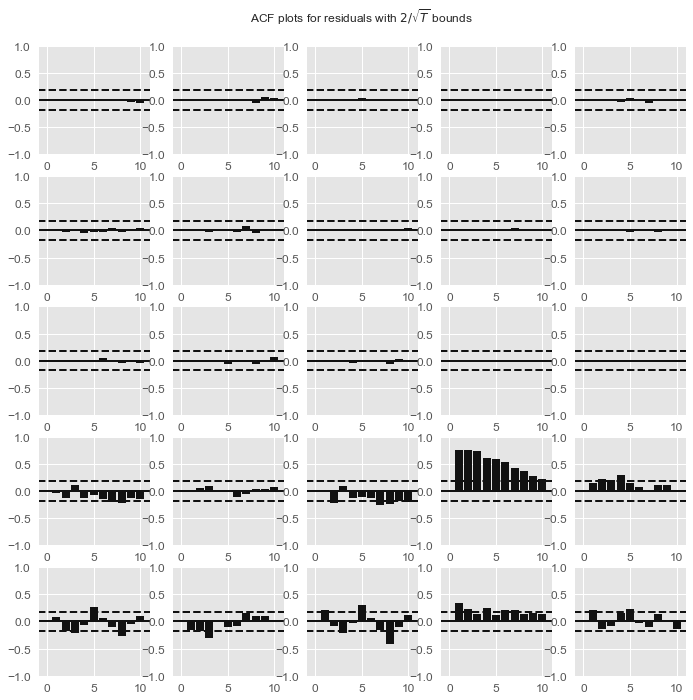

In [518]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
#plt.style.use('seaborn-bright')
mpl.rc('lines', lw=2, c='r')
results.plot_acorr()
plt.savefig('bush_corr5.png', figsize=(5,8), dpi=300, bbox_inches='tight')

In [431]:
print(model.select_order(15))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 12, BIC -> 9, FPE -> 12, HQIC -> 9>


In [462]:
results = model.fit(maxlags=12, ic='aic')
print(results)

In [573]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


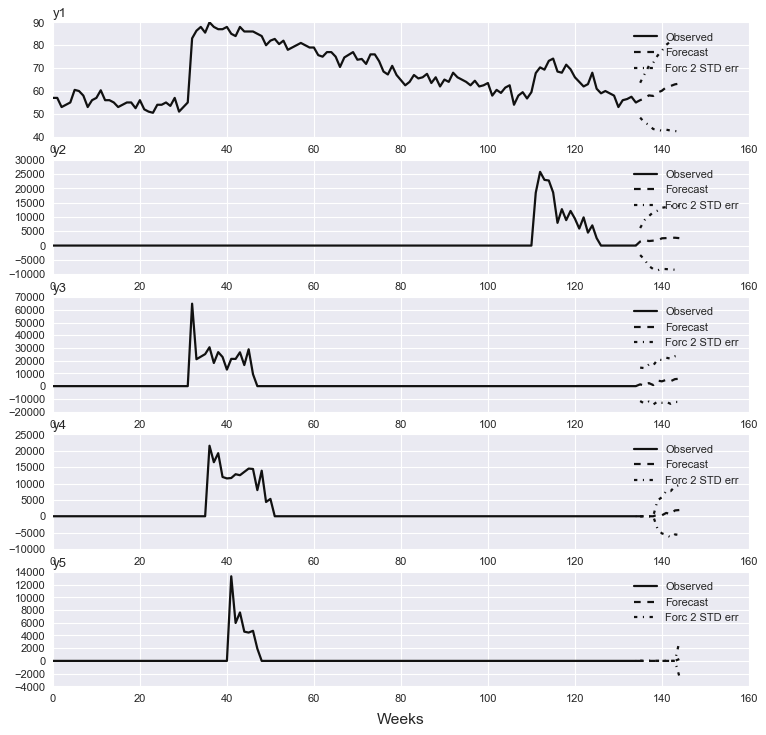

In [580]:
## import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('seaborn')
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rc('lines', linewidth=2, linestyle='-')
results.plot_forecast(10)
plt.xlabel('Weeks', labelpad = 8, fontsize = 14)
labels = [item.get_text() for item in ax.get_xticklabels()]
plt.savefig('bush_multi_reg3.png', figsize=(6,8), dpi=300, bbox_inches='tight')


In [547]:
yhat = results.forecast(results.y, steps=len(valid))
yhat

D:\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[ 5.60018329e+01,  1.40942211e+03,  1.41183450e+03,
         5.67044444e-13,  6.10670105e-13],
       [ 5.67850640e+01,  2.01037005e+03,  2.36470626e+02,
         1.24913606e-12, -5.21877539e-13],
       [ 5.80903904e+01,  1.58140573e+03,  2.40166517e+03,
         1.95882771e-12,  3.81143114e-13],
       [ 5.78491225e+01,  1.72126394e+03,  8.51071079e+02,
         3.85455611e-13,  5.68944037e-13],
       [ 5.93006616e+01,  1.78639297e+03,  4.36150550e+03,
         4.69449944e+02,  6.77424666e-13],
       [ 6.01391923e+01,  2.54315427e+03,  3.75903554e+03,
         2.85111731e+02, -7.22281508e-13],
       [ 6.16427883e+01,  2.61323415e+03,  4.98131287e+03,
         1.01795485e+03,  2.09458137e-12],
       [ 6.22013978e+01,  2.70463878e+03,  3.83710559e+03,
         6.10376368e+02, -5.58627512e-13],
       [ 6.29218791e+01,  2.73969431e+03,  5.51659475e+03,
         1.78209310e+03,  1.29018592e-12],
       [ 6.32558972e+01,  2.59917183e+03,  5.79039200e+03,
         1.89489939e+03

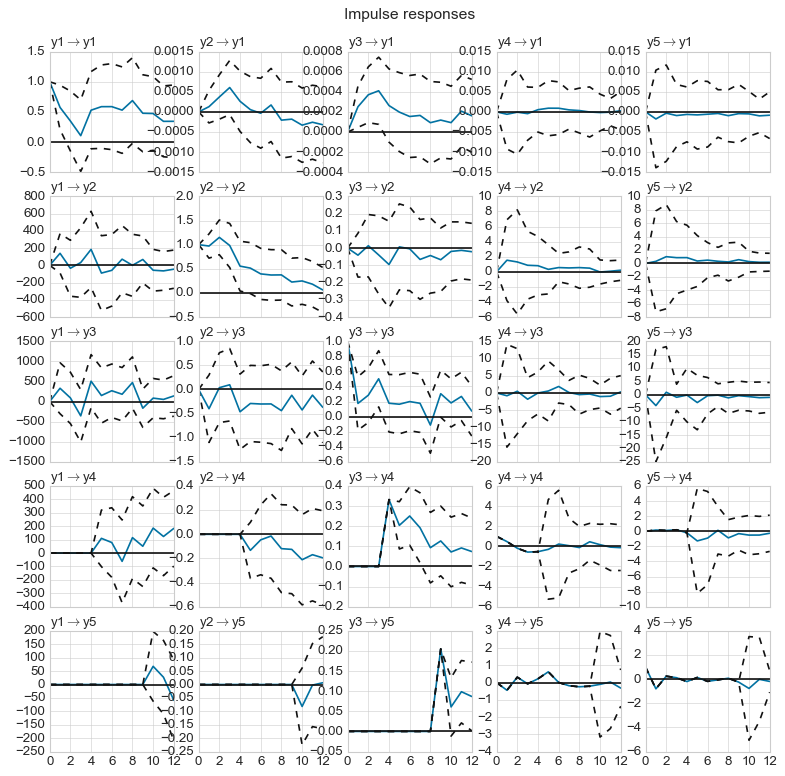

In [600]:
irf = results.irf(12)
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['axes.labelsize'] = 12
irf.plot(orth=False)
plt.savefig('bush_imp_new5.png', figsize=(6,8), dpi=300, bbox_inches='tight')

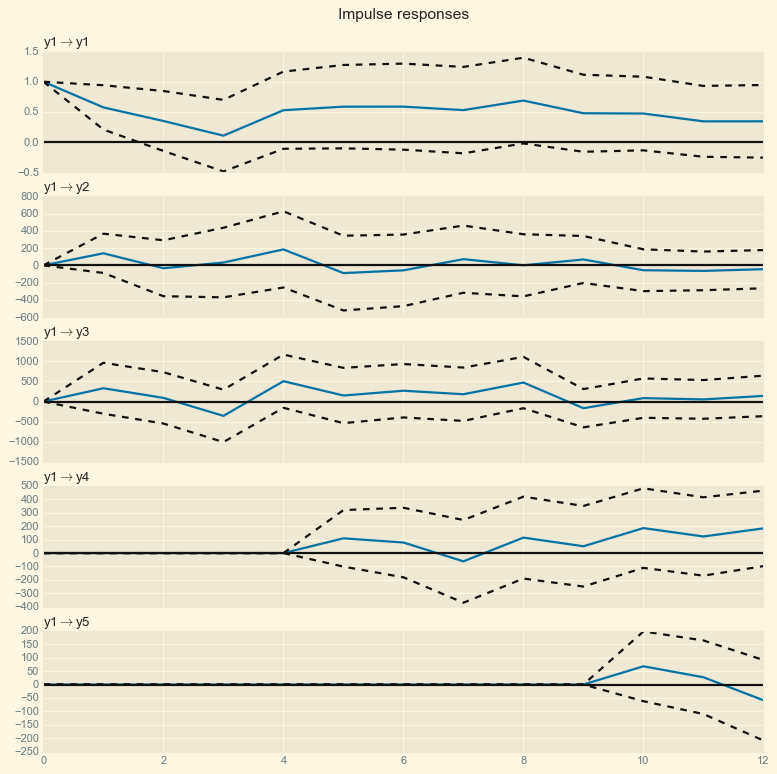

In [606]:
plt.style.use('seaborn-whitegrid')
irf.plot(impulse='y1')
plt.savefig('bush_impulse_new3.png', figsize=(6,8), dpi=300, bbox_inches='tight')

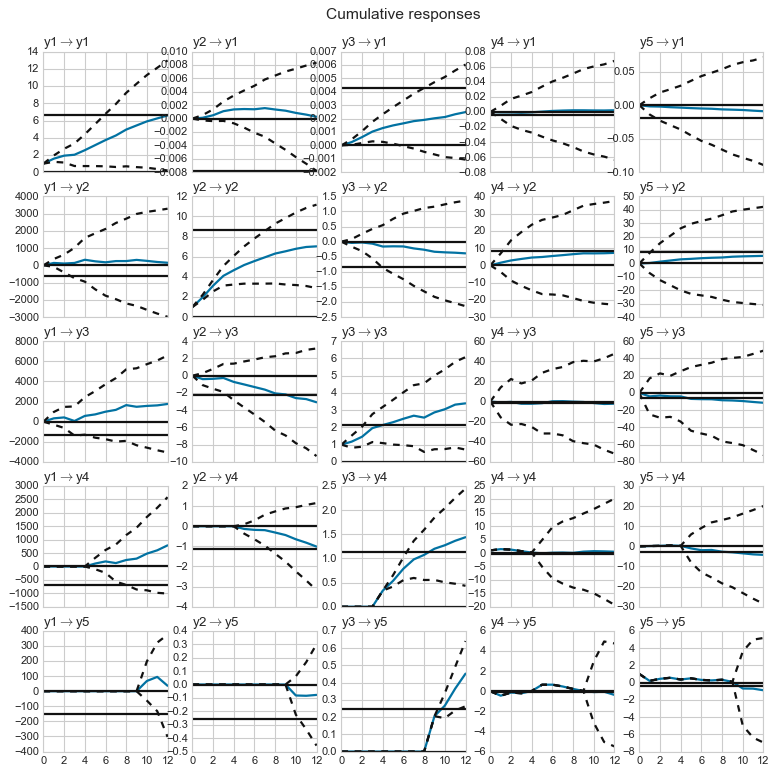

In [607]:
plt.style.use('seaborn-whitegrid')
irf.plot_cum_effects(orth=False)
plt.savefig('bush_impulse_new.png', figsize=(8,8), dpi=300, bbox_inches='tight')
plt.show()

In [623]:
df= pd.read_csv("D:\\Documents\\DATA\\bushjob.csv")
exog_plus = df[["approve","iraqwar","wtc","afghan","kabul"]]

In [631]:
exog_plus = df[["approve","iraqwar","wtc","afghan","kabul"]]
model = VAR(exog_plus)
results = model.fit()
irf = results.irf(10)


AttributeError: module 'matplotlib.pyplot' has no attribute 'irf'

In [632]:
fevd = results.fevd(12)
fevd.summary()

FEVD for approve
       approve   iraqwar       wtc    afghan     kabul
0     1.000000  0.000000  0.000000  0.000000  0.000000
1     0.994045  0.000018  0.005513  0.000395  0.000030
2     0.987996  0.000025  0.011287  0.000621  0.000070
3     0.983174  0.000024  0.015999  0.000687  0.000115
4     0.979428  0.000021  0.019715  0.000672  0.000164
5     0.976467  0.000018  0.022675  0.000627  0.000214
6     0.974068  0.000016  0.025078  0.000574  0.000264
7     0.972079  0.000016  0.027066  0.000525  0.000313
8     0.970402  0.000017  0.028738  0.000484  0.000360
9     0.968967  0.000018  0.030160  0.000451  0.000404
10    0.967726  0.000020  0.031384  0.000424  0.000445
11    0.966646  0.000023  0.032443  0.000404  0.000484

FEVD for iraqwar
       approve   iraqwar       wtc    afghan     kabul
0     0.047469  0.952531  0.000000  0.000000  0.000000
1     0.046485  0.953483  0.000021  0.000011  0.000000
2     0.045605  0.954302  0.000061  0.000031  0.000001
3     0.044816  0.955014  0.00

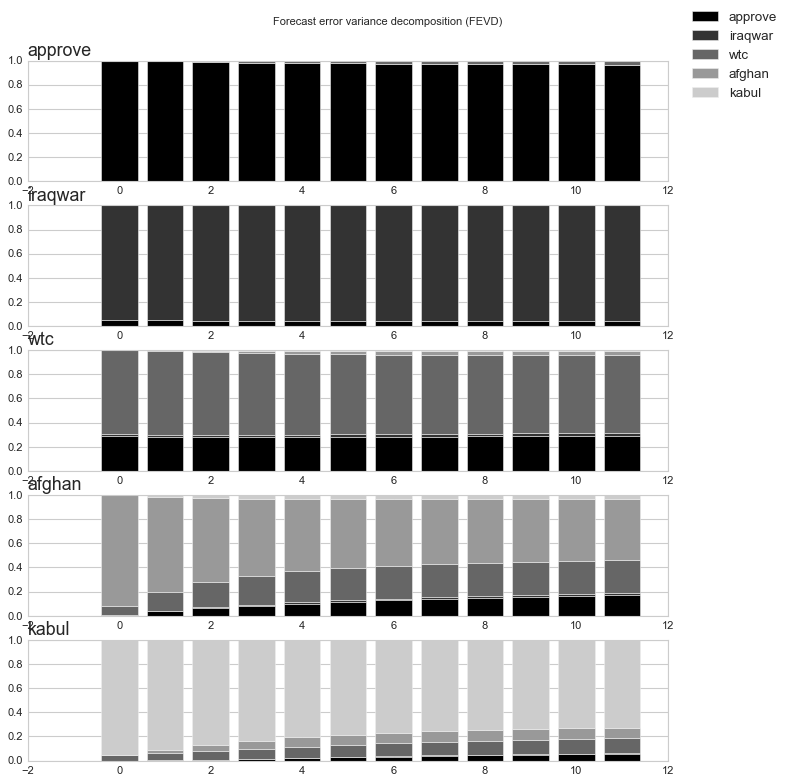

In [633]:
from statsmodels.tsa.vector_ar.var_model import FEVD
#plt.style.use('seaborn-poster')
#results.fevd(20).plot()
fevd = results.fevd(12)
FEVD.plot(fevd)
plt.savefig('bush_fevd_new2.png', figsize=(8,10), dpi=300, bbox_inches='tight')

In [634]:
FEVD.summary(fevd)

FEVD for approve
       approve   iraqwar       wtc    afghan     kabul
0     1.000000  0.000000  0.000000  0.000000  0.000000
1     0.994045  0.000018  0.005513  0.000395  0.000030
2     0.987996  0.000025  0.011287  0.000621  0.000070
3     0.983174  0.000024  0.015999  0.000687  0.000115
4     0.979428  0.000021  0.019715  0.000672  0.000164
5     0.976467  0.000018  0.022675  0.000627  0.000214
6     0.974068  0.000016  0.025078  0.000574  0.000264
7     0.972079  0.000016  0.027066  0.000525  0.000313
8     0.970402  0.000017  0.028738  0.000484  0.000360
9     0.968967  0.000018  0.030160  0.000451  0.000404
10    0.967726  0.000020  0.031384  0.000424  0.000445
11    0.966646  0.000023  0.032443  0.000404  0.000484

FEVD for iraqwar
       approve   iraqwar       wtc    afghan     kabul
0     0.047469  0.952531  0.000000  0.000000  0.000000
1     0.046485  0.953483  0.000021  0.000011  0.000000
2     0.045605  0.954302  0.000061  0.000031  0.000001
3     0.044816  0.955014  0.00

In [704]:
print(results.test_causality('approve', ['iraqwar', 'wtc'], kind='f'))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause approve: fail to reject at 5% significance level. Test statistic: 1.771, critical value: 3.005>, p-value: 0.171>


In [705]:
print(results.test_causality('wtc', ['approve'], kind='f'))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: approve does not Granger-cause wtc: fail to reject at 5% significance level. Test statistic: 0.443, critical value: 3.851>, p-value: 0.506>


In [41]:
print(results.test_normality())

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: reject at 5% significance level. Test statistic: 49406.426, critical value: 18.307>, p-value: 0.000>


In [644]:
print(results.test_whiteness())

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: reject at 5% significance level. Test statistic: 740.856, critical value: 260.992>, p-value: 0.000>


In [693]:
y


array([57.        , 57.        , 53.        , 54.        , 55.        ,
       60.5       , 60.        , 58.        , 53.        , 56.        ,
       57.        , 60.33333206, 56.        , 56.        , 55.        ,
       53.        , 54.        , 55.        , 55.        , 52.5       ,
       56.        , 52.        , 51.        , 50.5       , 54.        ,
       54.        , 55.        , 53.5       , 57.        , 51.        ,
       53.        , 55.        , 83.        , 86.33333588, 88.        ,
       85.5       , 90.        , 88.        , 87.        , 87.        ,
       88.        , 85.        , 84.        , 88.        , 86.        ,
       86.        , 86.        , 85.        , 84.        , 80.        ,
       82.        , 82.75      , 80.5       , 82.        , 78.        ,
       79.        , 80.        , 81.        , 80.        , 79.        ,
       79.        , 75.66666412, 75.        , 77.        , 77.        ,
       75.        , 70.5       , 74.66666412, 76.        , 77.  

In [981]:
dfts

,approve,iraqwar,wtc,afghan,kabul
0,57.0,0,0,0,0
1,57.0,0,0,0,0
2,53.0,0,0,0,0
3,54.0,0,0,0,0
4,55.0,0,0,0,0
...,...,...,...,...,...
189,49.0,0,0,0,0
190,52.0,0,0,0,0
191,48.5,0,0,0,0
192,45.0,0,0,0,0


In [982]:
df_test

,approve,iraqwar,wtc,afghan,kabul
182,46.666664,0,0,0,0
183,47.166668,0,0,0,0
184,46.000000,0,0,0,0
185,49.000000,0,0,0,0
186,50.000000,0,0,0,0
187,51.500000,0,0,0,0
188,52.000000,0,0,0,0
189,49.000000,0,0,0,0
190,52.000000,0,0,0,0
191,48.500000,0,0,0,0


In [1014]:
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,69.30,69.40,1.255e+30,69.34
1,66.83,67.41,1.062e+29,67.07
2,66.12,67.18,5.218e+28,66.55
3,65.50,67.04,2.800e+28,66.12
4,64.32,66.34,8.668e+27,65.14
5,63.28,65.78,3.075e+27,64.29
6,61.14,64.12,3.670e+26,62.35
7,58.77,62.23,3.474e+25,60.18
8,55.31,59.25,1.109e+24,56.91
9,-66.12,-61.70*,2.095e-29,-64.32*


In [1015]:
model_fitted = model.fit(12)
model_fitted.summary()

D:\anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1416: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Nov, 2020
Time:                     11:35:08
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -60.9753
Nobs:                     168.000    HQIC:                  -64.3451
Log likelihood:           4711.42    FPE:                1.35210e-29
AIC:                     -66.6468    Det(Omega_mle):     2.87328e-30
--------------------------------------------------------------------
Results for equation approve
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.024387         0.306443            0.080           0.937
L1.approve            -1.212147         0.137805           -8.796           0.000
L1.iraqwar             0.000156         0.000183      

In [1032]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: approve')
accuracy_prod = forecast_accuracy(df_results['approve_forecast'].values, df_test['approve'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: iraqwar')
accuracy_prod = forecast_accuracy(df_results['iraqwar_forecast'].values, df_test['iraqwar'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: wtc')
accuracy_prod = forecast_accuracy(df_results['wtc_forecast'].values, df_test['wtc'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: afghan')
accuracy_prod = forecast_accuracy(df_results['afghan_forecast'].values, df_test['afghan'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: kabul')
accuracy_prod = forecast_accuracy(df_results['kabul_forecast'].values, df_test['kabul'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: approve
mape   :  0.0481
me     :  -0.5351
mae    :  2.3413
mpe    :  -0.0084
rmse   :  2.755
corr   :  -0.0802
minmax :  0.0468

Forecast Accuracy of: iraqwar
mape   :  inf
me     :  873.3409
mae    :  873.3409
mpe    :  inf
rmse   :  959.0786
corr   :  nan
minmax :  1.0

Forecast Accuracy of: wtc
mape   :  inf
me     :  -2978.3442
mae    :  2978.3442
mpe    :  -inf
rmse   :  3153.2168
corr   :  nan
minmax :  inf

Forecast Accuracy of: afghan
mape   :  inf
me     :  -854.8525
mae    :  854.8525
mpe    :  -inf
rmse   :  1113.8956
corr   :  nan
minmax :  inf

Forecast Accuracy of: kabul
mape   :  inf
me     :  -140.0831
mae    :  140.0831
mpe    :  nan
rmse   :  325.384
corr   :  nan
minmax :  inf


<ipython-input-1032-d9f6adcb55d7>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-1032-d9f6adcb55d7>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
<ipython-input-1032-d9f6adcb55d7>:13: RuntimeWarning: divide by zero encountered in true_divide
  minmax = 1 - np.mean(mins/maxs)             # minmax


In [724]:
adfuller_test('wtc') 

NameError: name 'adfuller' is not defined

In [646]:
sm.graphics.tsa.plot_pacf(results(), lags=40)
plt.savefig('bush_pcf.png', figsize=(8,4), dpi=150, bbox_inches='tight')
plt.show()

TypeError: 'VARResultsWrapper' object is not callable

In [45]:
trn = np.asarray(train[["iraqwar","wtc","afghan","kabul"]])
val = np.asarray(valid[["iraqwar","wtc","afghan","kabul"]])
yt = train[['approve']]
yv = valid[['approve']]

In [1460]:
#exogx = np.array(df[["rdpi","wtc"]])
fit_exog = sm.tsa.ARIMA(yt, order=(1,1,1), exog = trn).fit()
print(fit_exog.fittedvalues)


D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


week
6     -0.218548
7     -0.212728
8      0.383322
9      0.107587
10    -0.191187
         ...   
135    0.859331
136    2.140499
137    1.241865
138    1.027079
139    0.706561
Length: 134, dtype: float64


In [1461]:
#trn = np.asarray(df[["rdpi","wtc"]])

In [1462]:
pred2 = fit_exog.predict(start = 50, end = 200, exog = trn)
print(pred2)

49    -1.521734
50    -1.093633
51    -1.378420
52    -0.897321
53    -1.366358
         ...   
195   -0.388760
196   -0.382681
197   -0.400918
198   -0.400918
199   -0.382681
Length: 151, dtype: float64


D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:796: SpecificationWarning: 
The number of observations in exog does not match the number of out-of-sample
observations.  This might indicate that exog is not correctly aligned. exog
should be aligned so that the exog[0] is used for the first out-of-sample
forecast, and exog[-1] is used for the last out-of-sample forecast.
exog is not used for in-sample observations which are the fitted values.

To silence this warning, ensure the number of observation in exog (136)
matches the number of out-of-sample forecasts (66)'

  warnings.warn(msg, SpecificationWarning)


D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


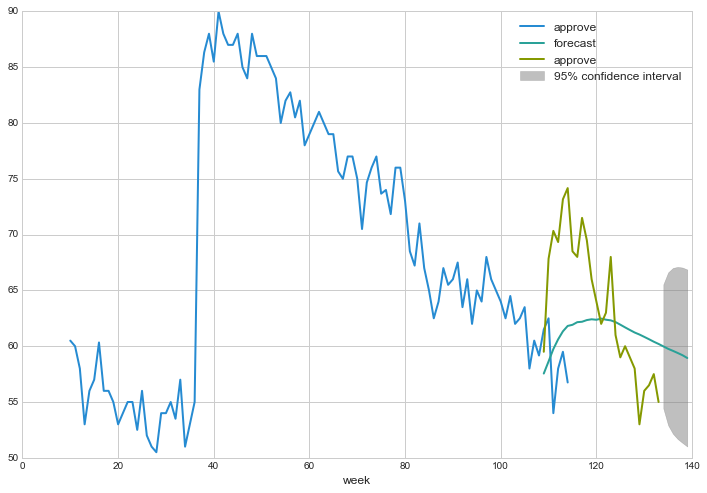

In [1463]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = yt[5:110].plot(ax=ax)
fig = fit_exog.plot_predict(110, 140, exog = trn, dynamic=True, ax=ax, plot_insample=True)

In [442]:
len(trn[110:140])

25

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 5 and the array at index 1 has size 3

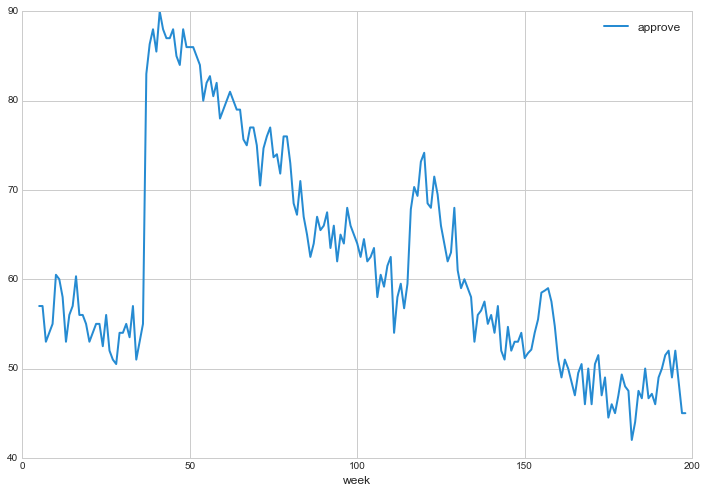

In [1466]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = y.plot(ax=ax)
fig = fit_exog.plot_predict(110, 140, exog = exogx, dynamic=True, ax=ax, plot_insample=True)

In [71]:
import numpy as np
def MAPE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [73]:
MAPE(yt, pred2)

15.415094956700933

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


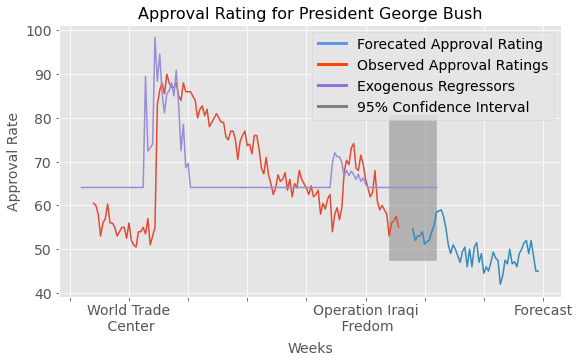

In [105]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(9, 5))
ax = yt[5:135].plot(ax=ax)
ax = yv[5:135].plot(ax=ax)
fig = fit_exog.plot_predict(5, 155, exog =trn, dynamic=True, ax=ax, plot_insample=False)
plt.title('Approval Rating for President George Bush', fontsize = 16)
plt.xlabel('Weeks', labelpad = 8, fontsize = 14)
plt.ylabel('Approval Rate', fontsize = 14)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[2] = 'World Trade\n Center'
labels[6] = 'Operation Iraqi\n Fredom'
labels[9] = 'Forecast'
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_xticklabels(labels)
colors = ['cornflowerblue', 'orangered', 'mediumpurple','gray']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Forecated Approval Rating', 'Observed Approval Ratings', 'Exogenous Regressors','95% Confidence Interval']
plt.legend(lines, labels, prop={'size': 14})
plt.show()

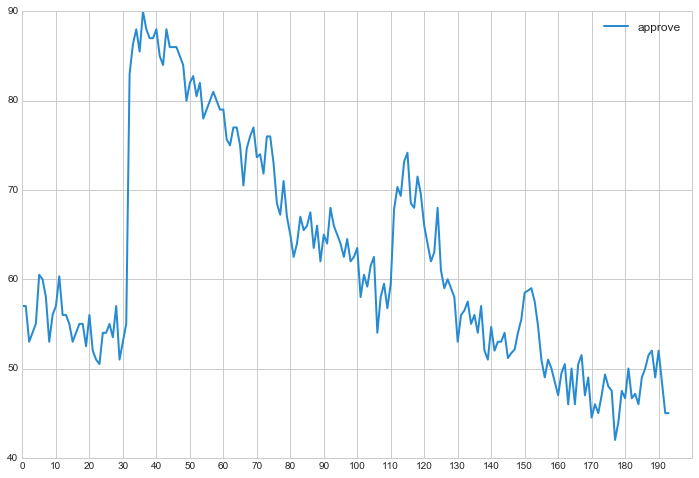

In [1066]:
# approval = plt.figure(figsize=(10, 5.15))
#approval.clf()
fig.canvas.draw()
df.ts.plot(figsize=(12,8))
#fig, ax = plt.subplots(figsize=(10, 5.15))
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Start'
labels[4] = 'World Trade\n Center'
#plot_P = plt.subplot(111)
plt.xticks(np.arange(0, 200, 10))
#plot_P.plot(pressure_smooth, linewidth=1.0)
#plot_P.set_ylabel('Approval Rate', labelpad=6)
#plot_P.set_xlabel('Weeks', labelpad=6)
#plt.title('Approval Rating for President George Bush', fontsize = 16)
#plt.xlabel('Weeks', labelpad = 8, fontsize = 14)
#plt.ylabel('Approval Rate', fontsize = 14)

#labels[10] = 'Operation Iraqi\n Fredom'
#labels[19] = 'End'
#plt.xticks(fontsize = 14)
#plt.yticks(fontsize = 14)
#ax.set_xticklabels(labels)
#colors = ['cornflowerblue', 'orangered', 'mediumpurple','gray']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#ax.set_xticklabels(labels)
plt.show()

In [106]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm
from pandas import Series, DataFrame, Panel

<ipython-input-106-f950cdd0f2a7>:8: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Series, DataFrame, Panel


In [108]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()
plot_mpl(fig)

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [306]:
import numpy as np
from scipy import stats
import pandas as pd

import statsmodels.api as sm

fit1 = sm.tsa.ARIMA(df.ts, (1,0,0)).fit()
#this works fine:
pred1 = fit1.predict(start=120, end = 180)
print(pred1)


week
125    69.122998
126    65.758340
127    63.835679
128    61.913017
129    62.874348
         ...    
181    48.454386
182    47.973721
183    42.686402
184    44.609063
185    47.973721
Length: 61, dtype: float64


D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [1085]:
df = pd.read_csv("D:\\Documents\\DATA\\bushjob.csv")

In [ ]:
df = pd.read_csv("D:\\Documents\\DATA\\bushjob.csv")
dfts = df.set_index('week', inplace=True)

In [ ]:
yp = fitexo.predict(start = 140, end = 198, exog = val)

In [1084]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

exogx = np.array(df[["wtc","iraqwar","afghan","kabul"]])
fitexo = sm.tsa.ARIMA(dfts, (4,0,1), exog = exogx).fit()
print(fitexo.summary())

ValueError: endog is required to have ndim 1 but has ndim 2

In [215]:
yp = fitexo.predict(start = 140, end = 198, exog = val)

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:796: SpecificationWarning: 
The number of observations in exog does not match the number of out-of-sample
observations.  This might indicate that exog is not correctly aligned. exog
should be aligned so that the exog[0] is used for the first out-of-sample
forecast, and exog[-1] is used for the last out-of-sample forecast.
exog is not used for in-sample observations which are the fitted values.

To silence this warning, ensure the number of observation in exog (63)
matches the number of out-of-sample forecasts (5)'

  warnings.warn(msg, SpecificationWarning)


In [193]:
sm.stats.diagnostic.acorr_ljungbox(fitexo.resid, lags=[36], return_df=True, boxpierce = False)

,lb_stat,lb_pvalue
36,28.529192,0.807814


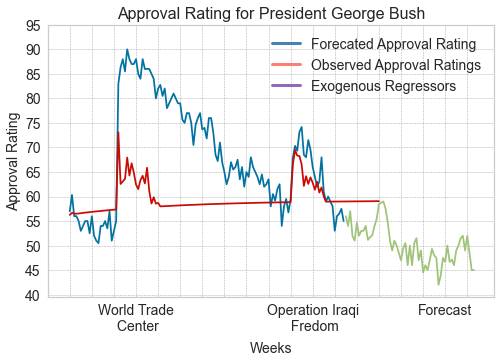

In [382]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = yt[10:].plot(ax=ax)
ax = yv[0:].plot(ax=ax)
fig = fitexo.plot_predict(10, 150, exog =trn, dynamic=True, ax=ax, plot_insample=False)
plt.title('Approval Rating for President George Bush', fontsize = 16)
plt.xlabel('Weeks', labelpad = 8, fontsize = 14)
plt.ylabel('Approval Rating', fontsize = 14)
ax.grid(which='major', linestyle='--', linewidth='0.5', color='darkgray')
ax.set_xticks(major_ticks)
major_ticks = np.arange(40, 100, 5)
ax.set_yticks(major_ticks)
major_ticks = np.arange(5, 198, 10)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[4] = 'World Trade\n Center'
labels[12] = 'Operation Iraqi\n Fredom'
labels[18] = 'Forecast'
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_xticklabels(labels)
colors = ['steelblue', 'salmon', 'tab:purple']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Forecated Approval Rating', 'Observed Approval Ratings', 'Exogenous Regressors']
plt.legend(lines, labels, prop={'size': 14})
plt.savefig('bush_exog1.png', figsize=(8,5), dpi=150, bbox_inches='tight')
plt.show()

In [1068]:
y=df['approve']

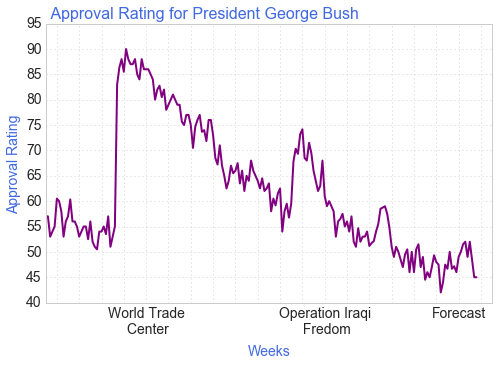

In [1083]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = y[0:].plot(ax=ax, color='purple')
#ax = yv[0:].plot(ax=ax)
#fig = fitexo.plot_predict(10, 150, exog =trn, dynamic=True, ax=ax, plot_insample=False)
plt.title(' Approval Rating for President George Bush', fontsize = 16, color = 'royalblue')
plt.xlabel('Weeks', labelpad = 8, fontsize = 14, color = 'royalblue')
plt.ylabel('Approval Rating', fontsize = 14, color = 'royalblue')
ax.grid(which='major', linestyle=':', linewidth='0.5', color='darkgray')
ax.set_xticks(major_ticks)
major_ticks = np.arange(40, 100, 5)
ax.set_yticks(major_ticks)
major_ticks = np.arange(5, 198, 10)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[4] = 'World Trade\n Center'
labels[12] = 'Operation Iraqi\n Fredom'
labels[18] = 'Forecast'
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_xticklabels(labels)
#colors = ['steelblue', 'salmon', 'tab:purple']
#lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
#labels = ['Forecated Approval Rating', 'Observed Approval Ratings', 'Exogenous Regressors']
#plt.legend(lines, labels, prop={'size': 14})
plt.savefig('bush_exog1.png', figsize=(8,5), dpi=300, bbox_inches='tight')
plt.show()

In [222]:
df['approve']

0      57.0
1      57.0
2      53.0
3      54.0
4      55.0
       ... 
189    49.0
190    52.0
191    48.5
192    45.0
193    45.0
Name: approve, Length: 194, dtype: float64

In [223]:
yp = fitexo.predict(start = 0, end = 193, exog = val)
residual = df['approve'].values-yp
residual

week
5     -2.207657
6     -0.079823
7     -4.072415
8      0.411801
9      0.728784
         ...   
194   -2.881926
195    2.618083
196   -3.451849
197   -4.278129
198   -0.743819
Length: 194, dtype: float64

In [171]:
trn = np.asarray(train[["iraqwar","wtc","afghan","kabul"]])
val = np.asarray(valid[["iraqwar","wtc","afghan","kabul"]])
yt = train[['approve']]
yv = valid[['approve']]

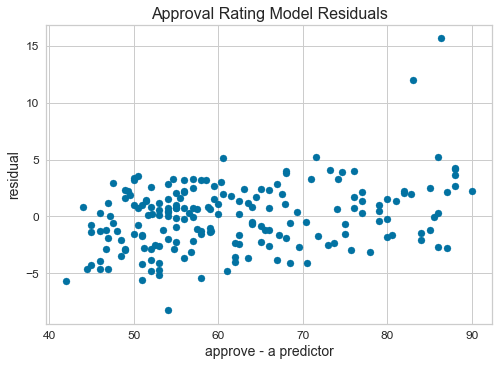

In [373]:
plt.scatter(df[["approve"]],residual)
plt.xlabel("approve - a predictor")
plt.ylabel("residual")
plt.title('Approval Rating Model Residuals', fontsize = 16)
matplotlib.rcParams['axes.labelsize'] = 14
plt.savefig('bush_scatter.png', figsize=(8,4), dpi=300, bbox_inches='tight')
plt.show()

In [376]:
bush_resid = fitexo.resid
stats.normaltest(bush_resid)

NormaltestResult(statistic=46.60487357709567, pvalue=7.583685038727367e-11)

In [377]:
sm.stats.durbin_watson(bush_resid.values)

1.990514441938174

<ipython-input-380-a1a2a690636b>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


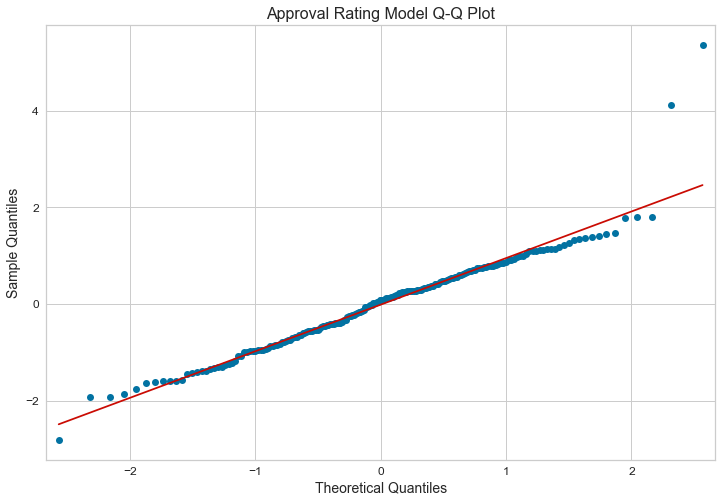

In [380]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
plt.title('Approval Rating Model Q-Q Plot', fontsize = 16)
ax = fig.add_subplot(111)
fig = qqplot(bush_resid, line='q', ax=ax, fit=True)
plt.savefig('bush_qq.png', figsize=(6,3), dpi=300, bbox_inches='tight')
plt.show()

In [233]:
tab = pd.crosstab(df['approve'], df['wtc'])
table = sm.stats.Table(tab)
print(table)

A 95x16 contingency table with counts:
[[1.  0.5 0.5 ... 0.5 0.5 0.5]
 [1.  0.5 0.5 ... 0.5 0.5 0.5]
 [1.  0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 1.  ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 1.  0.5]]


In [374]:
MAPE(yt,yp)

18.76506441538958

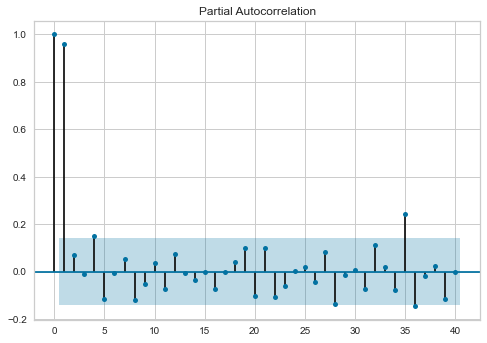

In [259]:
sm.graphics.tsa.plot_pacf(df.ts.values.squeeze(), lags=40)
plt.savefig('bush_pcf.png', figsize=(8,4), dpi=150, bbox_inches='tight')
plt.show()

In [312]:
from scipy import stats
import matplotlib.pyplot as plt

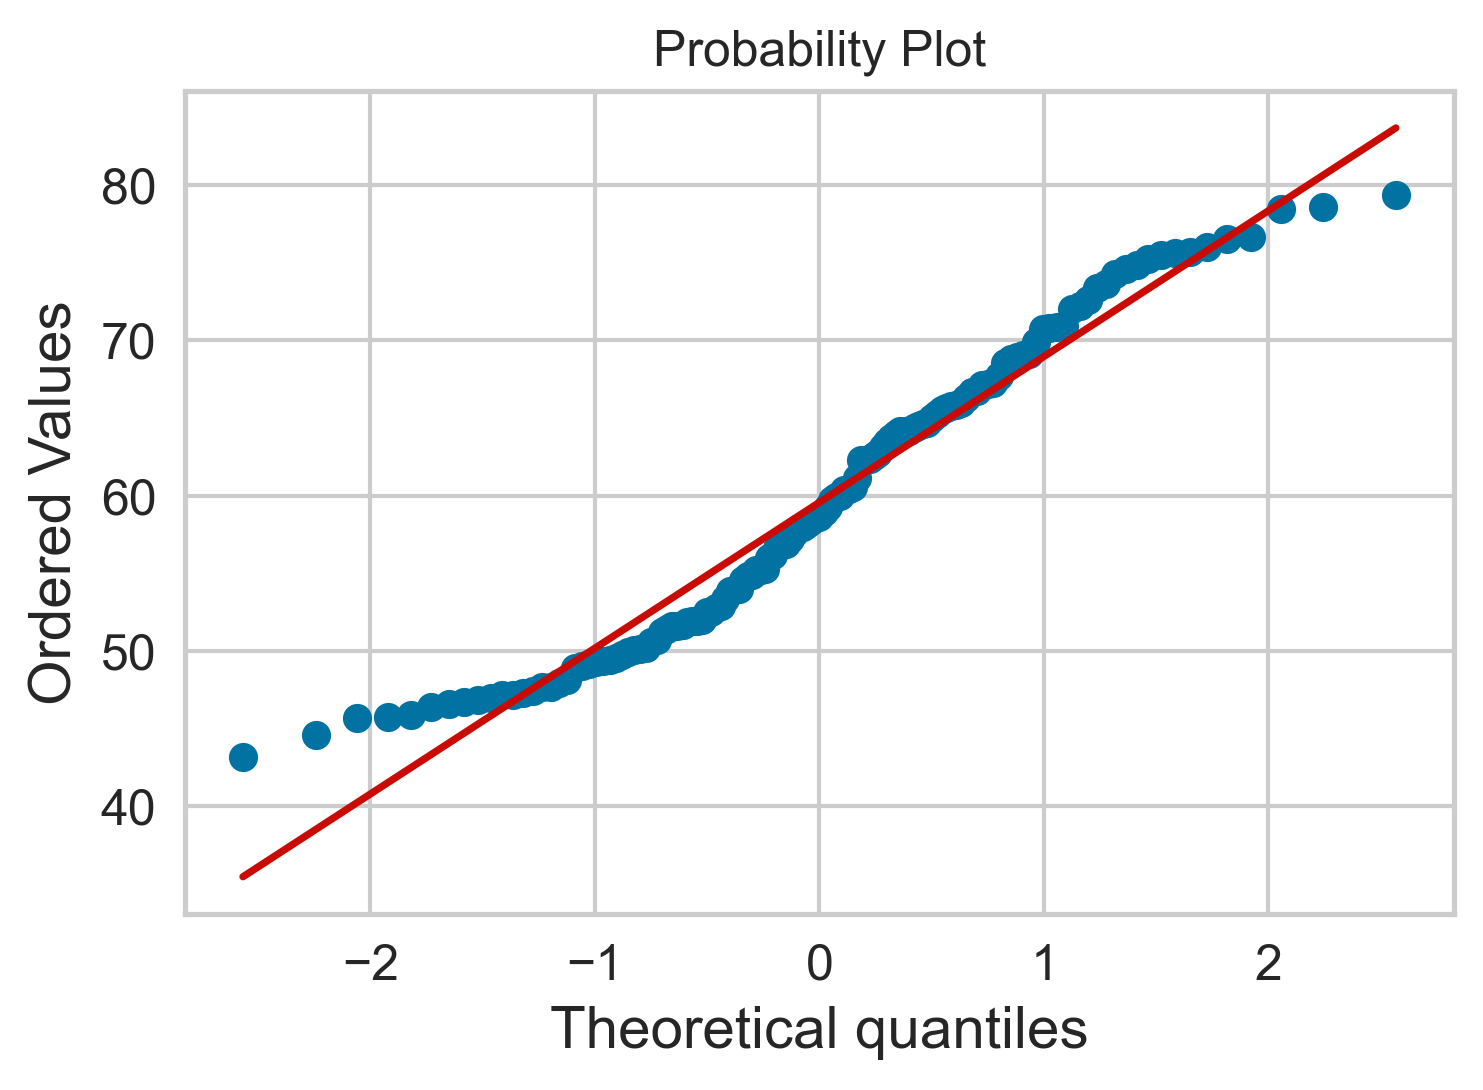

In [369]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 300)
fig = plt.subplot(222)
ax = stats.probplot(yp, plot=plt)
matplotlib.rcParams['axes.labelsize'] = 12
plt.savefig('bush_prob.png', figsize=(12,8), dpi=300, bbox_inches='tight')
plt.show()

In [1103]:
y = df[["approve"]]
exogx = df[["wtc","iraqwar"]]

In [1104]:
mod = sm.tsa.ARIMA(y, (4,0,1), exog = exogx)
#mod = sm.tsa.ARIMA(df.ts, order=(4,0,1))
results = mod.fit()
results.summary()

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                approve   No. Observations:                  194
Model:                     ARMA(4, 1)   Log Likelihood                -485.798
Method:                       css-mle   S.D. of innovations              2.938
Date:                Thu, 05 Nov 2020   AIC                            989.596
Time:                        07:07:50   BIC                           1019.007
Sample:                             0   HQIC                          1001.506
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            59.7193      7.366      8.108      0.000      45.283      74.156
wtc               0.0002   3.89e-05      6.236      0.000       0.000       0.000
iraqwar           0.0004      0.000      3.538      0.000       0.000       0.001
ar.L1.approve     0.9403      0.598      1.573      0.116      -0.232       2.112
ar.L2.approve    -0.0069      0.527     -0.013      0.990      -1.040       1.026
ar.L3.approve    -0.0260      0.107     -0.243      0.808      -0.236       0.184
ar.L4.approve     0.0711      0.081      0.882      0.378      -0.087       0.229
ma.L1.approve    -0.0741      0.601     -0.123      0.902      -1.253       1.105
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0189           -0.0000j            1.0189           -0.0000
AR.2            0.9491           -2.1236j            2.3261           -0.1831
AR.3            0.9491           +2.1236j            2.3261            0.1831
AR.4           -2.5510           -0.0000j            2.5510           -0.5000
MA.1           13.4883           +0.0000j           13.4883            0.0000
-----------------------------------------------------------------------------
"""

In [343]:
mod = sm.tsa.statespace.SARIMAX(yt,
                                order=(4, 0, 1),
                                seasonal_order=(0, 0, 0, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4715      0.442      1.067      0.286      -0.394       1.337
ar.L2          0.4875      0.446      1.093      0.274      -0.387       1.362
ar.L3         -0.1434      0.126     -1.143      0.253      -0.389       0.103
ar.L4          0.1828      0.123      1.484      0.138      -0.059       0.424
ma.L1          0.5054      0.451      1.120      0.263      -0.379       1.389
sigma2        13.3007      0.893     14.889      0.000      11.550      15.052


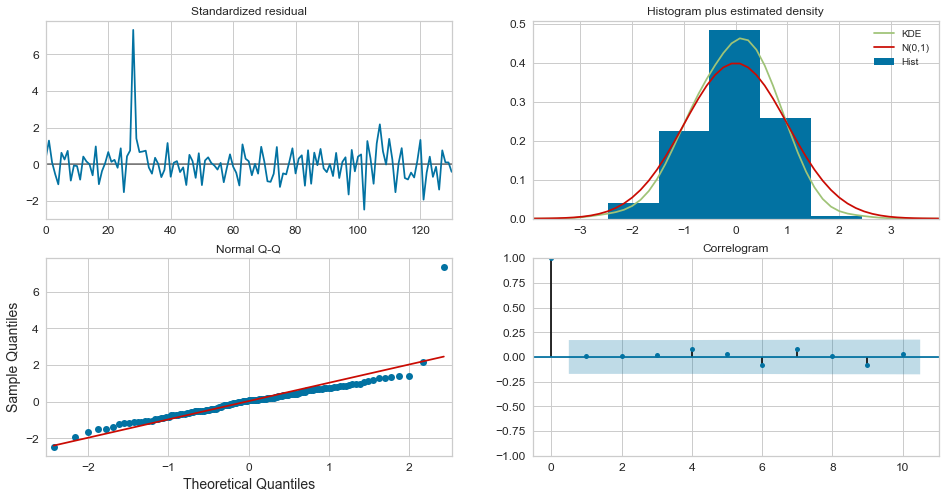

In [348]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('bush_diag', figsize=(8,4), dpi=300, bbox_inches='tight')
plt.show()

In [347]:
yp = fitexo.predict(start = 59, end = 193, exog = val)

In [1116]:
y_new = df[["adj_app"]]
model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
new_fit = model.fit(disp=False)
new_fit.summary()

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                approve   No. Observations:                  194
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -508.591
Date:                Thu, 05 Nov 2020   AIC                           1023.181
Time:                        07:56:17   BIC                           1032.969
Sample:                             0   HQIC                          1027.145
                                - 194                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7824      0.332     -2.354      0.019      -1.434      -0.131
ma.L1          0.7047      0.366      1.925      0.054      -0.013       1.422
sigma2        11.3854      0.574     19.826      0.000      10.260      12.511
===================================================================================
Ljung-Box (Q):                       23.69   Jarque-Bera (JB):              4071.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             2.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [747]:
df.ts = df[["approve"]]
exogx = df[["iraqwar","wtc","afghan","kabul"]]

<ipython-input-747-b8954416c41a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ts = df[["approve"]]


In [1113]:

# Import libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

# fit model
model = SARIMAX(y, exog=exogx, order=(4, 0, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
model_fit.summary()
# make prediction
#yhat = model_fit.predict(len(df.ts), len(exogx), exog=[exogx])
#print(yhat)

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                approve   No. Observations:                  194
Model:               SARIMAX(4, 0, 1)   Log Likelihood                -552.519
Date:                Thu, 05 Nov 2020   AIC                           1121.038
Time:                        07:13:46   BIC                           1147.181
Sample:                             0   HQIC                          1131.624
                                - 194                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wtc            0.0004   2.56e-05     14.585      0.000       0.000       0.000
iraqwar        0.0004      0.000      2.587      0.010    9.72e-05       0.001
ar.L1         -0.6315      0.108     -5.823      0.000      -0.844      -0.419
ar.L2          0.0449      0.055      0.812      0.417      -0.064       0.153
ar.L3          0.6660      0.077      8.698      0.000       0.516       0.816
ar.L4          0.9204      0.098      9.415      0.000       0.729       1.112
ma.L1          0.9904      0.063     15.805      0.000       0.868       1.113
sigma2        15.7256      1.277     12.316      0.000      13.223      18.228
===================================================================================
Ljung-Box (Q):                       63.99   Jarque-Bera (JB):               534.73
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [750]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                approve   No. Observations:                  194
Model:               SARIMAX(4, 0, 1)   Log Likelihood                -551.261
Date:                Sun, 01 Nov 2020   AIC                           1122.523
Time:                        21:14:00   BIC                           1155.201
Sample:                             0   HQIC                          1135.755
                                - 194                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
iraqwar        0.0004      0.000      2.261      0.024    5.74e-05       0.001
wtc            0.0004   4.41e-05      9.575      0.000       0.000       0.001
afghan      3.548e-06      0.000      0.014      0.989      -0.001       0.001
kabul         -0.0003      0.000     -1.200      0.230      -0.001       0.000
ar.L1         -0.7852      0.381     -2.060      0.039      -1.532      -0.038
ar.L2          0.1826      0.096      1.895      0.058      -0.006       0.371
ar.L3          0.9065      0.048     18.820      0.000       0.812       1.001
ar.L4          0.6952      0.368      1.889      0.059      -0.026       1.417
ma.L1          0.9113      0.373      2.444      0.015       0.181       1.642
sigma2        19.0564      2.226      8.562      0.000      14.694      23.419
===================================================================================
Ljung-Box (Q):                       84.45   Jarque-Bera (JB):               710.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             1.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [818]:
ypred = model_fit.predict(start = 131, end = 189, exog = val)
ypred

131    58.292536
132    57.215299
133    53.580495
134    56.353554
135    56.232637
136    57.266457
137    54.683771
138    56.218932
139    53.619409
140    56.277899
141    51.688588
142    51.821481
143    53.967910
144    52.326496
145    53.000965
146    52.906755
147    53.452020
148    51.234513
149    52.101199
150    52.593816
151    54.775003
152    56.026821
153    58.724025
154    58.416703
155    58.481586
156    56.278635
157    53.813398
158    50.635924
159    49.350658
160    50.572485
161    49.479860
162    48.462091
163    47.569810
164    49.221165
165    50.043563
166    46.136252
167    50.031385
168    46.584902
169    50.638724
170    50.409905
171    47.032220
172    48.162017
173    44.591676
174    46.146129
175    45.525590
176    47.466705
177    48.896684
178    47.221985
179    46.615738
180    42.641936
181    44.786489
182    47.663513
183    46.907899
184    49.492914
185    46.377265
186    47.517730
187    46.442583
188    49.702483
189    50.0609

In [1129]:
y_true=yt[71:130]

In [1144]:
y_new = df[["adj_app"]]
model = SARIMAX(y_new, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
new_fit = model.fit(disp=False)
new_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                adj_app   No. Observations:                  195
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -475.448
Date:                Thu, 05 Nov 2020   AIC                            956.895
Time:                        08:16:43   BIC                            966.699
Sample:                             0   HQIC                           960.865
                                - 195                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1235      0.258      0.480      0.631      -0.381       0.628
ma.L1         -0.4098      0.237     -1.730      0.084      -0.874       0.054
sigma2         7.8707      0.600     13.126      0.000       6.695       9.046
===================================================================================
Ljung-Box (Q):                       35.76   Jarque-Bera (JB):                51.09
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                            -0.53
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1145]:
ypred = new_fit.predict(start = 131, end = 189)

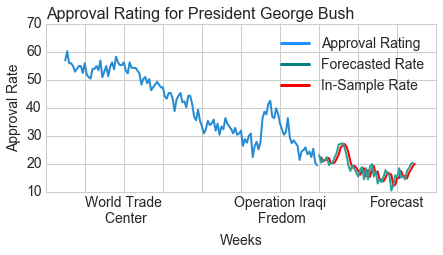

In [1165]:
fig, ax = plt.subplots(figsize=(7, 3))
ax = y_new[10:140].plot(ax=ax)
fig = ypred[10:].plot(ax=ax, color='red')
ax = y_new[140:189].plot(ax=ax)
plt.title('Approval Rating for President George Bush', fontsize = 16)
plt.xlabel('Weeks', labelpad = 8, fontsize = 14)
plt.ylabel('Approval Rate', fontsize = 14)
ax.set_xticks(major_ticks)
major_ticks = np.arange(0, 200, 20)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[2] = 'World Trade\n Center'
labels[6] = 'Operation Iraqi\n Fredom'
labels[9] = 'Forecast'
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_xticklabels(labels)
colors = ['dodgerblue', 'teal', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Approval Rating', 'Forecasted Rate', 'In-Sample Rate']
plt.legend(lines, labels, prop={'size': 14})
plt.savefig('bush_forecast01.png', figsize=(7,3), dpi=300, bbox_inches='tight')
plt.show()

In [878]:
MAPE(ytrue, ypred)

nan

In [1171]:
ytrue = dfts[131:190]

In [1172]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sm.tsa.statespace import SARIMAX

ModuleNotFoundError: No module named 'sm'

In [1173]:
model = SARIMAX(y, exog=exogx, order=(4, 0, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [1174]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                approve   No. Observations:                  194
Model:               SARIMAX(4, 0, 1)   Log Likelihood                -552.519
Date:                Thu, 05 Nov 2020   AIC                           1121.038
Time:                        15:45:37   BIC                           1147.181
Sample:                             0   HQIC                          1131.624
                                - 194                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wtc            0.0004   2.56e-05     14.585      0.000       0.000       0.000
iraqwar        0.0004      0.000      2.587      0.010    9.72e-05       0.001
ar.L1         -0.6315      0.108     -5.823      0.000      -0.844      -0.419
ar.L2          0.0449      0.055      0.812      0.417      -0.064       0.153
ar.L3          0.6660      0.077      8.698      0.000       0.516       0.816
ar.L4          0.9204      0.098      9.415      0.000       0.729       1.112
ma.L1          0.9904      0.063     15.805      0.000       0.868       1.113
sigma2        15.7256      1.277     12.316      0.000      13.223      18.228
===================================================================================
Ljung-Box (Q):                       63.99   Jarque-Bera (JB):               534.73
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1234]:
df = pd.read_csv("D:\\Documents\\DATA\\bushjob.csv")
df = df[0:194]
df

,week,early,bd,nn,approve,adj_app,iraq,rdpi,pop,rdpipcly,...,unoccupy,igc,unhq,italian,saddam,prisoner,uniraq,karzai,obs,rdpipc
0,5.0,1.0,0.0,1.0,57.0,57.000000,0.0,7279.399902,284266.0000,0.000320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.025608
1,6.0,1.0,0.0,7.0,57.0,57.000000,0.0,7279.399902,284266.0000,0.000320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.025608
2,7.0,1.0,0.0,7.0,53.0,53.000000,0.0,7279.399902,284266.0000,0.000320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.025608
3,8.0,1.0,0.0,7.0,54.0,54.000000,0.0,7279.399902,284266.0000,0.000320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.025608
4,9.0,1.0,0.0,7.0,55.0,55.000000,0.0,7286.256836,284388.8571,0.000306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.025621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,194.0,0.0,14.0,7.0,49.0,17.367218,46.0,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,NaN
190,195.0,0.0,14.0,7.0,52.0,20.364848,47.0,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.0,NaN
191,196.0,0.0,11.0,7.0,48.5,16.867613,47.0,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,NaN
192,197.0,0.0,19.0,7.0,45.0,13.370377,45.0,0.000000,0.0000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,NaN


In [1235]:

dfts = df.set_index('week', inplace=True)
y = df[["approve"]]
allexogx = df[["approve","wtc","iraqwar","afghan","kabul"]]
exogx = df[["wtc","iraqwar","afghan","kabul"]]

In [1236]:
model = SARIMAX(y, exog=exogx, order=(4, 0, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
model_fit.summary()

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                approve   No. Observations:                  194
Model:               SARIMAX(4, 0, 1)   Log Likelihood                -551.261
Date:                Thu, 05 Nov 2020   AIC                           1122.523
Time:                        18:25:30   BIC                           1155.201
Sample:                             0   HQIC                          1135.755
                                - 194                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wtc            0.0004   4.41e-05      9.575      0.000       0.000       0.001
iraqwar        0.0004      0.000      2.261      0.024    5.74e-05       0.001
afghan      3.547e-06      0.000      0.014      0.989      -0.001       0.001
kabul         -0.0003      0.000     -1.200      0.230      -0.001       0.000
ar.L1         -0.7852      0.381     -2.060      0.039      -1.532      -0.038
ar.L2          0.1826      0.096      1.895      0.058      -0.006       0.371
ar.L3          0.9065      0.048     18.820      0.000       0.812       1.001
ar.L4          0.6952      0.368      1.889      0.059      -0.026       1.417
ma.L1          0.9113      0.373      2.444      0.015       0.181       1.642
sigma2        19.0564      2.226      8.562      0.000      14.694      23.419
===================================================================================
Ljung-Box (Q):                       84.45   Jarque-Bera (JB):               710.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                             1.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1237]:
ytrue = y[131:190]
ypred = model_fit.predict(start = 131, end = 189)

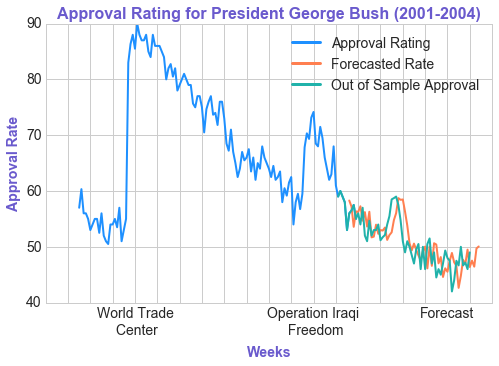

In [1238]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = yt[10:189].plot(ax=ax, color = 'dodgerblue')
fig = ypred[5:].plot(ax=ax, color = 'coral')
fig = ytrue[0:].plot(ax=ax, color = 'lightseagreen')
plt.xticks(np.arange(0, 200, 10))
ax.set_title('Approval Rating for President George Bush (2001-2004)', loc='center', fontsize = 16, color = 'slateblue', fontweight='bold')
#plt.title('Approval Rating for President George Bush (2001-2004)', fontsize = 16)
plt.xlabel('Weeks', labelpad = 8, fontsize = 14, color = 'slateblue', fontweight='bold')
plt.ylabel('Approval Rate', fontsize = 14, color = 'slateblue', fontweight='bold')
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[4] = 'World Trade\n Center'
labels[12] = 'Operation Iraqi\n Freedom'
labels[18] = 'Forecast'
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_xticklabels(labels)
colors = ['dodgerblue', 'coral', 'lightseagreen']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Approval Rating', 'Forecasted Rate', 'Out of Sample Approval']
plt.legend(lines, labels, prop={'size': 14})
plt.savefig('bush_forecast.png', figsize=(5,3), dpi=300, bbox_inches='tight')
plt.show()

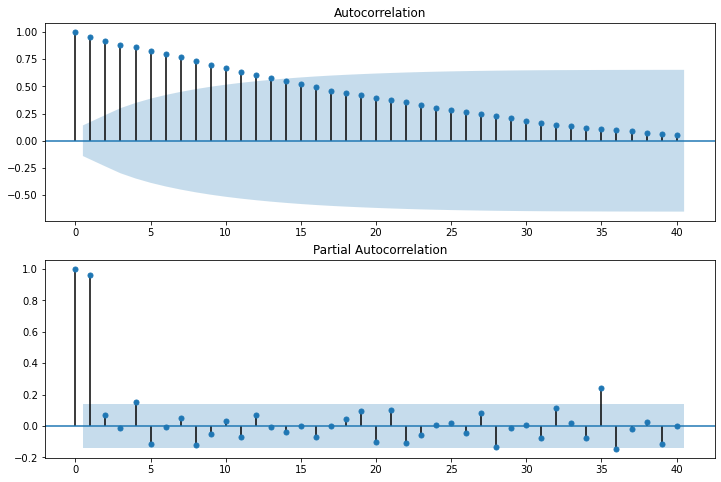

In [922]:
%matplotlib inline
fig = plt.figure(figsize =  (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.ts.values.squeeze(), lags=40, 
ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.ts, lags = 40, ax = ax2)


In [928]:
import numpy as np
def MAPE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [930]:
MAPE(ytrue, ypred)

9.184058754841384

In [931]:
ypred.shape

(59,)

In [934]:
ytrue.shape

(59, 1)

In [963]:
arima_mod_1 = sm.tsa.ARIMA(yt, order =  (1,0,0))
arima_fit_1 = arima_mod_1.fit(trend = 'c', disp = 1)
print(arima_fit_1.summary())

                              ARMA Model Results                              
Dep. Variable:                approve   No. Observations:                  135
Model:                     ARMA(1, 0)   Log Likelihood                -367.566
Method:                       css-mle   S.D. of innovations              3.653
Date:                Mon, 02 Nov 2020   AIC                            741.132
Time:                        13:08:33   BIC                            749.848
Sample:                             0   HQIC                           744.674
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            64.9211      5.047     12.864      0.000      55.029      74.813
ar.L1.approve     0.9433      0.027     34.953      0.000       0.890       0.996
                                    Root

In [984]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(yt, trace=True, error_action='ignore', suppress_warnings=True)
auto_model.fit(yt)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=743.895, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1034.724, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=741.132, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=918.295, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1524.447, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=743.090, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=743.091, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=743.005, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.994 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [985]:
print(auto_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  135
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -367.566
Date:                Mon, 02 Nov 2020   AIC                            741.132
Time:                        13:51:44   BIC                            749.848
Sample:                             0   HQIC                           744.674
                                - 135                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6952      2.797      1.321      0.186      -1.786       9.177
ar.L1          0.9431      0.042     22.428      0.000       0.861       1.026
sigma2        13.3456      0.721     18.519      0.0

In [980]:
forecast = auto_model.predict(n_periods=len(yv))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

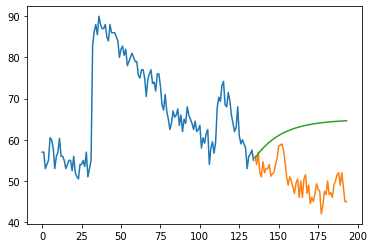

In [978]:
#plot the predictions for validation set
plt.plot(yt, label='Train')
plt.plot(yv, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

IndexError: list assignment index out of range

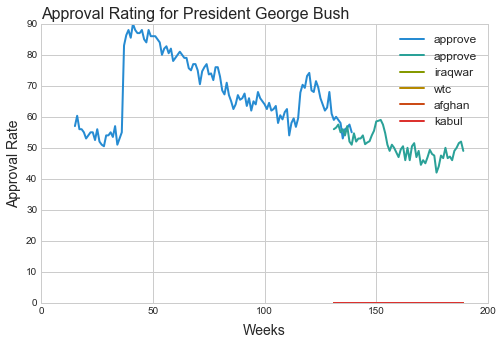

In [1177]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = yt[10:189].plot(ax=ax)
#fig = fitexo.plot_predict(10, 200, exog =exogx, dynamic=True, ax=ax, plot_insample=False)
fig = ytrue[0:].plot(ax=ax)
plt.title('Approval Rating for President George Bush', fontsize = 16)
plt.xlabel('Weeks', labelpad = 8, fontsize = 14)
plt.ylabel('Approval Rate', fontsize = 14)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[2] = 'World Trade\n Center'
labels[6] = 'Operation Iraqi\n Fredom'
labels[8] = 'Forecast'
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax.set_xticklabels(labels)
colors = ['dodgerblue', 'orange', 'green']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Approval Rating', 'Forecasted Rate', 'Out of Sample Approval']
plt.legend(lines, labels, prop={'size': 14})
plt.savefig('bush_forecast.png', figsize=(5,3), dpi=300, bbox_inches='tight')
plt.show()

In [983]:
MAPE(ytrue, forecast)

23.525968236142216